# Importing Libraries 

In [1099]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn import feature_selection
from sklearn.cluster import AgglomerativeClustering
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import average_precision_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

## Spotify-2023

In [1100]:
df_spotify_original = pd.read_csv('datasets/spotify-2023.csv', index_col=0, encoding='ISO-8859-1')

# Dataset Description

- This dataset contains the most famous songs of 2023 as listed on Spotify. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

- In this project, our main goal is to create a Machine Learning model to predict the category of the mode feature when given data with the same attributes.

- Before we create our models, first we must clean the data and extract the significant features for our analysis

In [1101]:
df_spotify_original.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


In [1102]:
df_spotify_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode     

In [1103]:
df_spotify_original.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [1104]:
df_spotify_original.describe(include=['object'])

,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,953,953,953,903,858,953
unique,645,949,348,198,11,2
top,Taylor Swift,723894473,0,0,C#,Major
freq,34,2,24,344,120,550


In [1105]:
df_spotify_original.isnull().mean() * 100

artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

In [1106]:
df_spotify = df_spotify_original.copy()

In [1107]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode     

# Data Cleaning

- As we so in the data exploration, the 'key' and 'in_shazam_charts' had missing values in the dataset.
- One way to deal with those missing values is to impute the 'key' by the mode because it is a categorical feature 
and impute the 'in_shazam_charts' by the mean because it is a continuous numerical attribute.
- There are 2 functions handling these imputations.

In [1108]:
def impute_keys_with_null_values(df):
    mode = df['key'].mode()[0]
    df['key'].fillna(mode, inplace=True)
    return df
impute_keys_with_null_values(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,...,144,A,Major,60,24,39,57,0,8,3
Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,...,166,F#,Major,42,7,24,83,1,12,6
A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,...,92,C#,Major,80,81,67,4,0,8,6


- Moreover, the datatype of 'in_deezer_playlist' was object although it is a numerical feature. This is because the numbers were seperated by commas every 3 digits (ex: 1,000). Therefore, we removed these commas to convert this feature to a float64 datatype.
- We also conerted features like 'in_deezer_charts' to be able to impute by the mean, and 'streams' which was also an object.
- Finally we converted all the int64 features to float64 except the date features and the 'artist(s)_name' feature. We did this for 
for normalization and standardization purposes.

In [1109]:
def remove_commas(df, column_name):
    df[column_name] = df[column_name].str.replace(',', '')
    return df
df_spotify = remove_commas(df_spotify, 'in_deezer_playlists')

In [1110]:
def convert_int64_to_float64(df):
    df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
    df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
    df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
    for col in df.columns:
        if df[col].dtype == 'int64' and col != 'released_year' and col != 'released_month' and col != 'released_day':
            df[col] = df[col].astype('float64')
    return df
convert_int64_to_float64(df_spotify)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0


In [1111]:
def impute_missing_values(df):
    mean = df['in_shazam_charts'].mean().round()
    df['in_shazam_charts'] = df['in_shazam_charts'].fillna(mean)
    return df
df_spotify = impute_missing_values(df_spotify)

- After converting the 'streams' to float64, we found a single null value, so we removed this record from the dataset by calling 
the bellow function.

In [1112]:
def remove_stream_with_null_values(df):
    df.dropna(subset=['streams'], inplace=True)
    return df
remove_stream_with_null_values(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0


In [1113]:
df_spotify.isnull().mean() * 100

artist(s)_name          0.0
artist_count            0.0
released_year           0.0
released_month          0.0
released_day            0.0
in_spotify_playlists    0.0
in_spotify_charts       0.0
streams                 0.0
in_apple_playlists      0.0
in_apple_charts         0.0
in_deezer_playlists     0.0
in_deezer_charts        0.0
in_shazam_charts        0.0
bpm                     0.0
key                     0.0
mode                    0.0
danceability_%          0.0
valence_%               0.0
energy_%                0.0
acousticness_%          0.0
instrumentalness_%      0.0
liveness_%              0.0
speechiness_%           0.0
dtype: float64

In [1114]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist(s)_name        952 non-null    object 
 1   artist_count          952 non-null    float64
 2   released_year         952 non-null    int64  
 3   released_month        952 non-null    int64  
 4   released_day          952 non-null    int64  
 5   in_spotify_playlists  952 non-null    float64
 6   in_spotify_charts     952 non-null    float64
 7   streams               952 non-null    float64
 8   in_apple_playlists    952 non-null    float64
 9   in_apple_charts       952 non-null    float64
 10  in_deezer_playlists   952 non-null    float64
 11  in_deezer_charts      952 non-null    float64
 12  in_shazam_charts      952 non-null    float64
 13  bpm                   952 non-null    float64
 14  key                   952 non-null    objec

In [1115]:
x = df_spotify.copy()

# Scaling

## Scaling percentage features

- First of all, we scaled all the percentage features by diving all the values by 100. This was done because the percentage features
are considered a normalization, so we just scale them to be from 0 to 1.

In [1116]:
percentage_features = ['danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'valence_%']
date_features = ['released_year', 'released_month', 'released_day']
def scale_features(df, percentage_features):
    for col in percentage_features:
        df[col] = df[col] / 100.0
    return df
scale_features(df_spotify, percentage_features)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,0.60,0.24,0.39,0.57,0.00,0.08,0.03
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,0.42,0.07,0.24,0.83,0.01,0.12,0.06
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,0.80,0.81,0.67,0.04,0.00,0.08,0.06


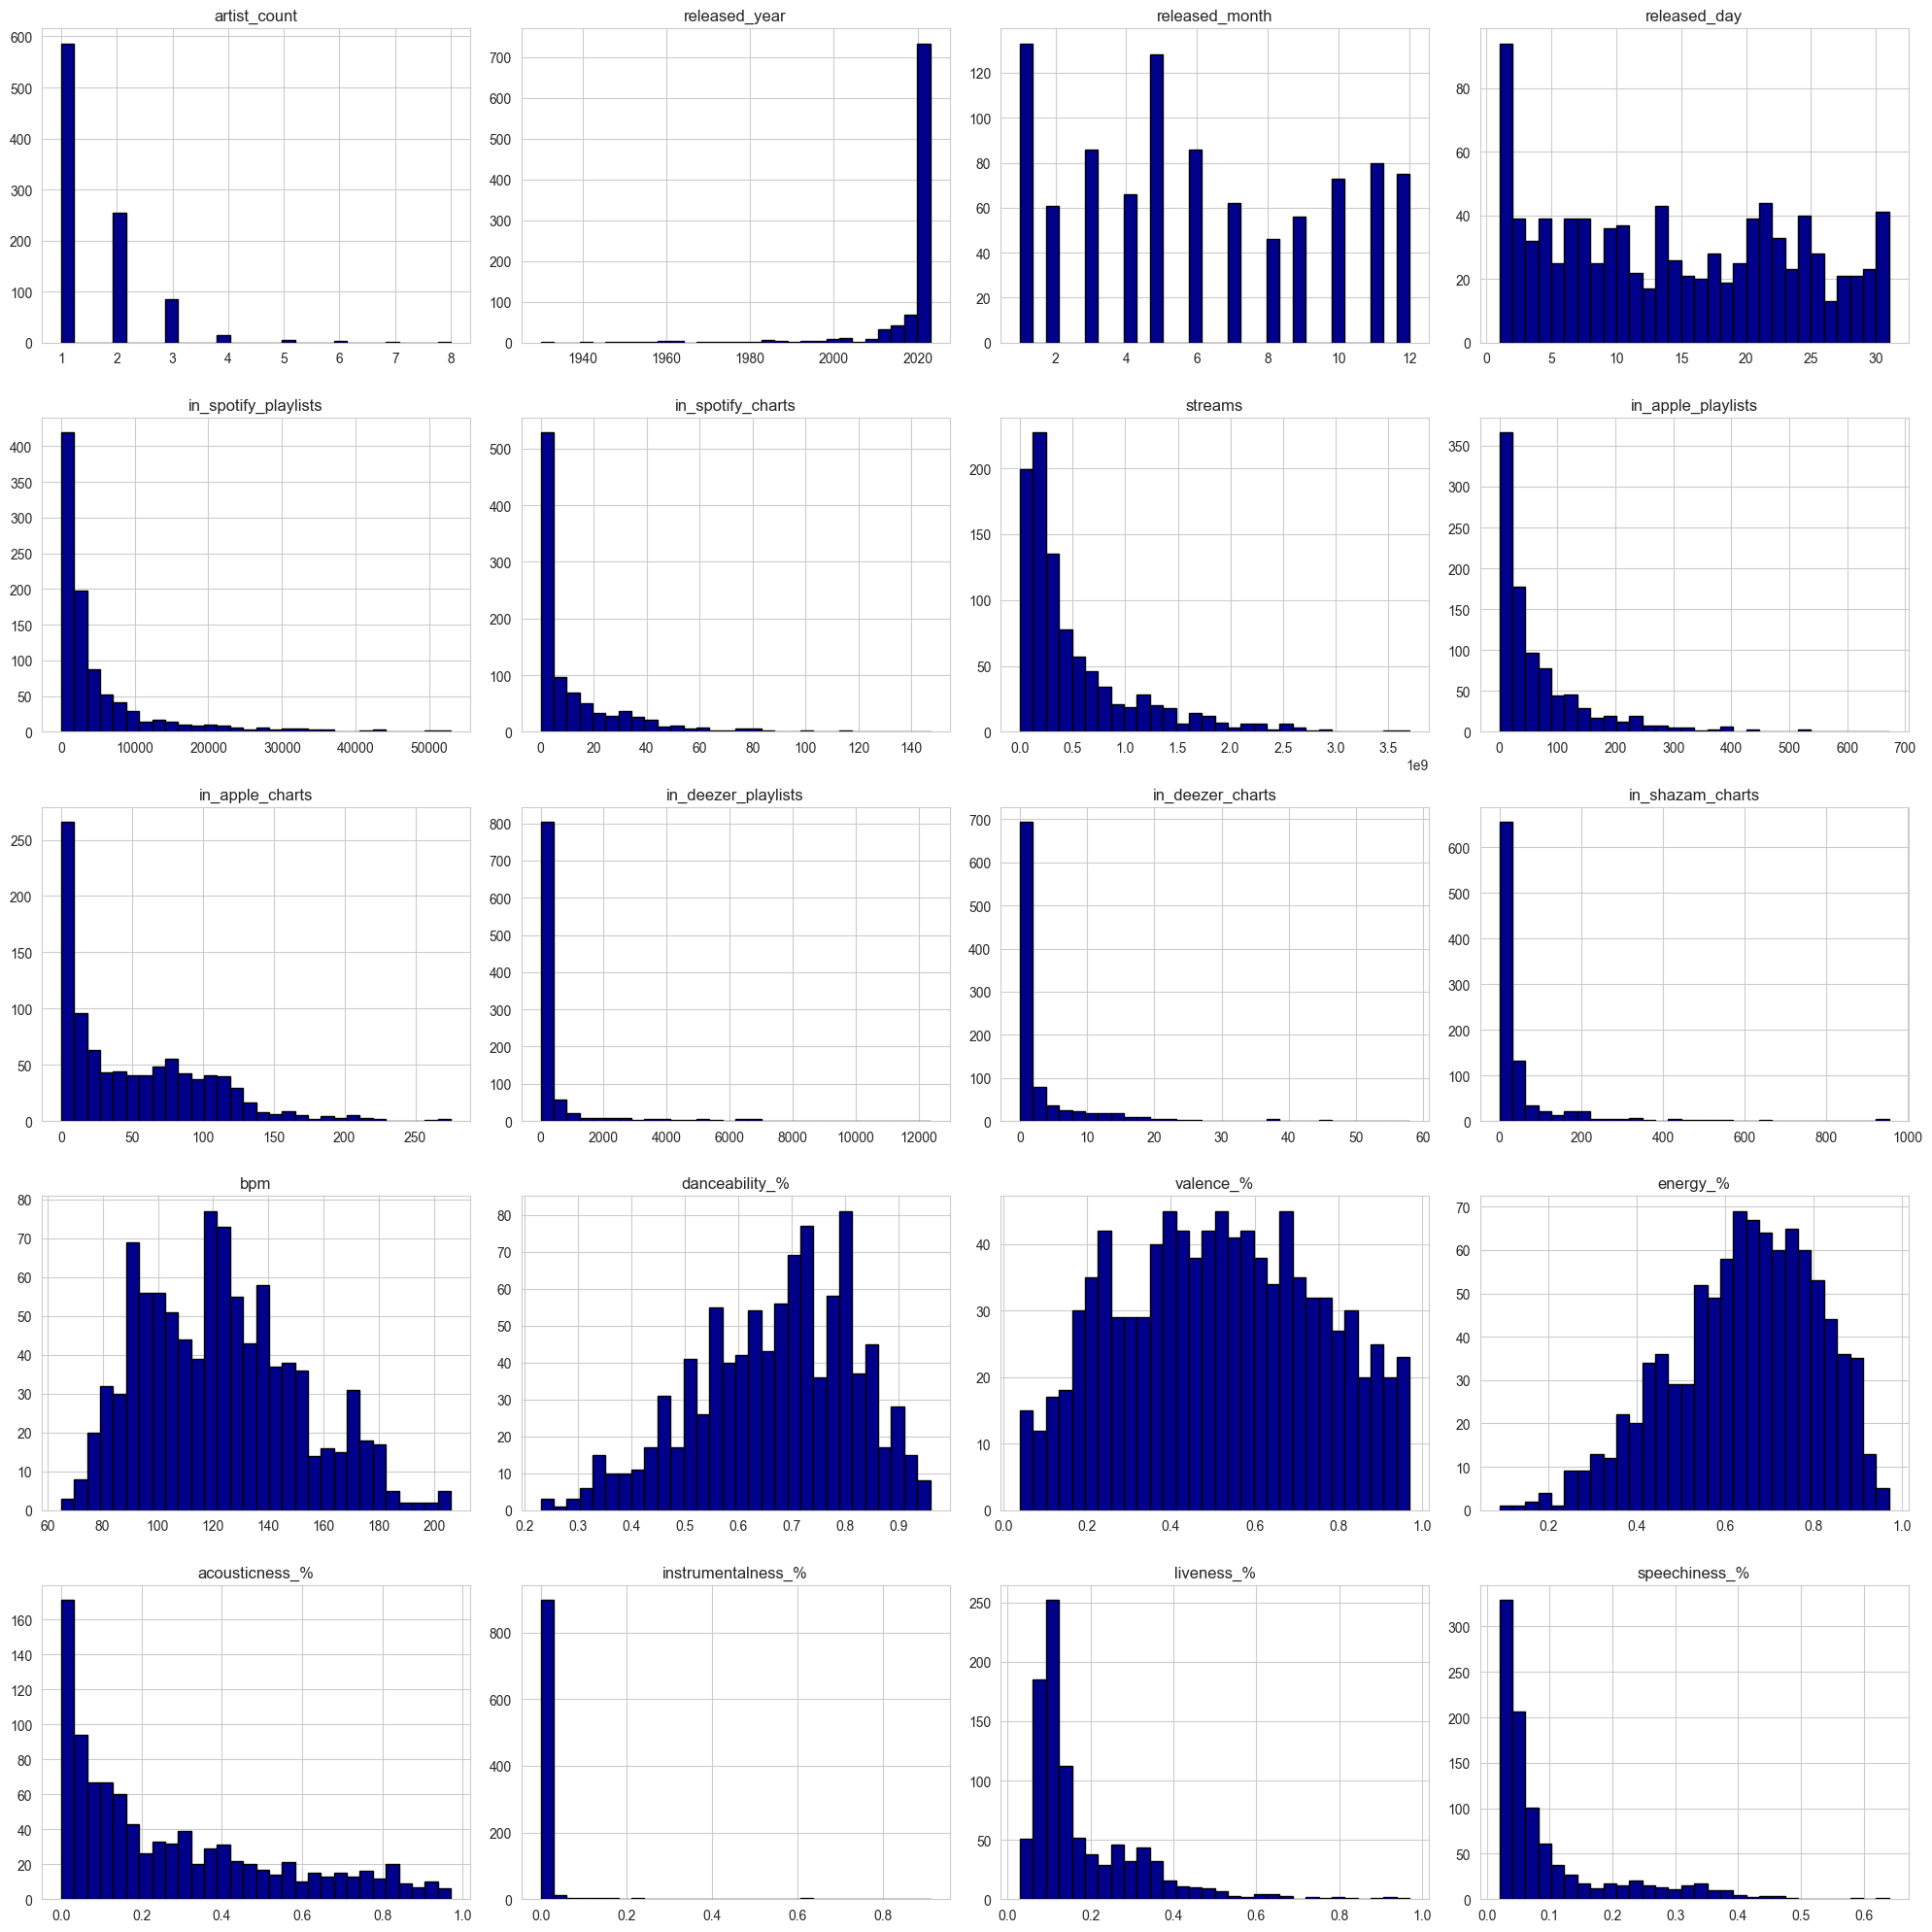

In [1117]:
# Set style
sns.set_style("whitegrid")

# Plotting histograms for all numerical columns
df_spotify.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(20,20), color='darkblue', edgecolor='black')
plt.tight_layout()  
plt.show()

## Normalization and Standardization

- First of all, the date features and the 'artist(s)_name' will not be normalized or standardized because they the discrete numeric features and scaling them could affect the Machine Learning model badly. That's why we didn't change their datatypes.
- For the rest of the numeric features, we will apply the QQ-Plot to decide whether to standardize or normalize each feature. First, we standardize all of them and create new column and then call the QQ-PLot. Based on the results, we decided to standardize the 'bpm' and normalize the rest. This decision was taken because in the QQ-Plot, the 'bpm' seemed to have a normal distribution. Also take a look on the above histogram to validate the decision. 

In [1118]:
def standardize(data: pd.Series) -> pd.Series:
    return (data - np.mean(data)) / np.std(data)

In [1119]:
def normalize(data: pd.Series) -> pd.Series:
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [1120]:
def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        if df[col].dtype == 'float64' and col != 'artist_count' and col not in percentage_features and col not in date_features:
            df[col + ' Z'] = standardize(df[col])
    return df
standardize_columns(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,speechiness_%,in_spotify_playlists Z,in_spotify_charts Z,streams Z,in_apple_playlists Z,in_apple_charts Z,in_deezer_playlists Z,in_deezer_charts Z,in_shazam_charts Z,bpm Z
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,0.04,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,6.317955,0.087202
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,0.04,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,2.697352,-1.089065
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,0.06,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,7.320959,0.550580
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,0.15,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,4.051001,1.691202
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,0.06,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,3.047996,0.764446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,0.03,-0.538107,-0.614244,-0.746019,-0.079451,-0.769990,-0.308306,-0.276574,-0.417670,0.764446
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,0.06,-0.509363,-0.614244,-0.692365,-0.738981,-1.026896,-0.333959,-0.442275,-0.417670,1.548624
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,0.06,-0.586225,-0.614244,-0.777719,-0.762123,-1.026896,-0.334844,-0.442275,-0.417670,-1.089065


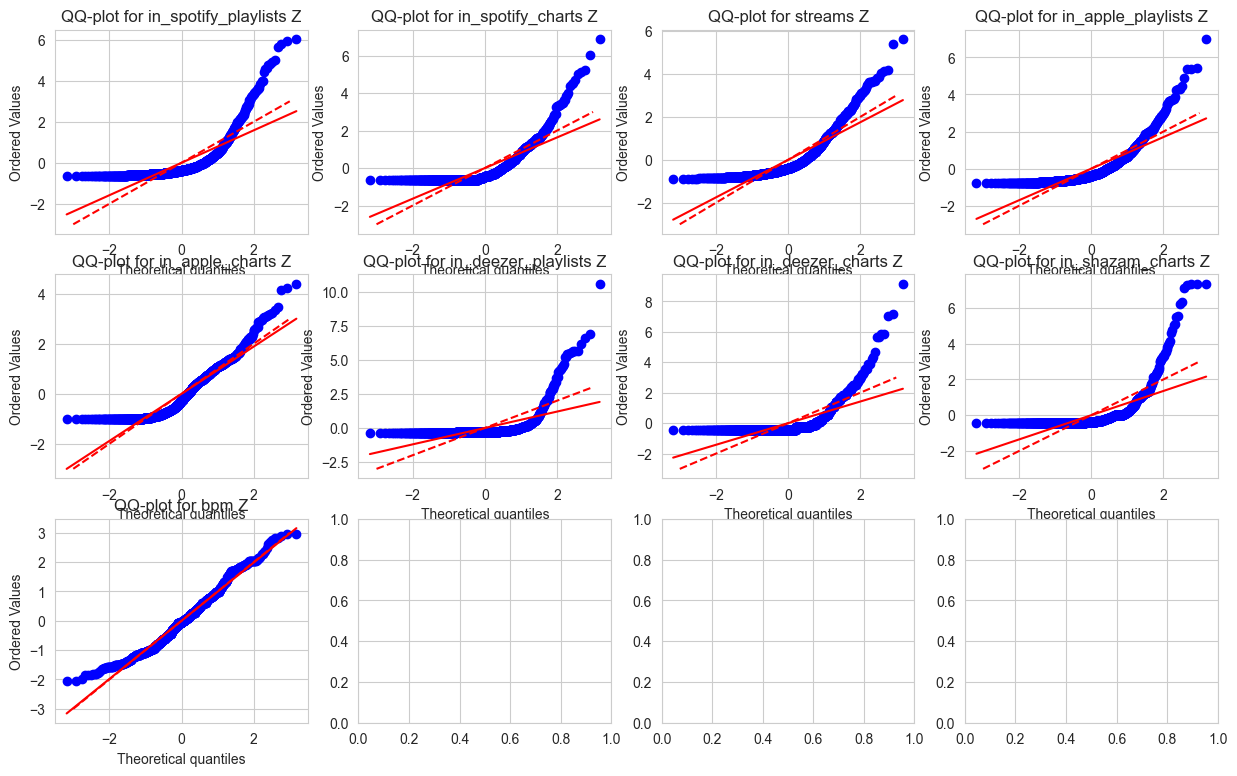

In [1121]:
def qq_plot(df: pd.DataFrame):
    col_names = df.columns[23:]
    num_plots = len(col_names)
    
    # Calculate the number of rows and columns for the grid
    num_rows = math.ceil(num_plots / 4)
    grid_cols = min(num_plots, 4)
    
    fig, axs = plt.subplots(num_rows, grid_cols, figsize=(15, num_rows*3))
    axs = axs.ravel()  # Flatten the array of axes to make it easier to iterate over
    
    for i, col in enumerate(col_names):
        stats.probplot(df[col], plot=axs[i])
        axs[i].set_title('QQ-plot for ' + col)
        axs[i].plot([-3, 3], [-3, 3], color='r', linestyle='--')

qq_plot(df_spotify)

In [1122]:
cols = ['bpm']
def normalize_cols(df: pd.DataFrame, cols: list):
    col_names = df.columns[:23]
    for col in col_names:
        if (col not in cols) and col != 'artist_count' and col not in percentage_features and df[col].dtype == 'float64' and col not in date_features:
            df[col] = normalize(df[col])
    return df
normalize_cols(df_spotify, cols)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,speechiness_%,in_spotify_playlists Z,in_spotify_charts Z,streams Z,in_apple_playlists Z,in_apple_charts Z,in_deezer_playlists Z,in_deezer_charts Z,in_shazam_charts Z,bpm Z
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,0.009874,1.000000,0.038170,0.063988,0.956364,...,0.04,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,6.317955,0.087202
LALA,Myke Towers,1.0,2023,3,23,0.027295,0.326531,0.036101,0.071429,0.458182,...,0.04,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,2.697352,-1.089065
vampire,Olivia Rodrigo,1.0,2023,6,30,0.025838,0.768707,0.037798,0.139881,0.752727,...,0.06,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,7.320959,0.550580
Cruel Summer,Taylor Swift,1.0,2019,8,23,0.148051,0.680272,0.216215,0.172619,0.752727,...,0.15,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,4.051001,1.691202
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,0.058676,0.340136,0.081869,0.125000,0.483636,...,0.06,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,3.047996,0.764446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,0.017440,0.000000,0.024696,0.090774,0.047273,...,0.03,-0.538107,-0.614244,-0.746019,-0.079451,-0.769990,-0.308306,-0.276574,-0.417670,0.764446
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,0.021734,0.000000,0.032903,0.005952,0.000000,...,0.06,-0.509363,-0.614244,-0.692365,-0.738981,-1.026896,-0.333959,-0.442275,-0.417670,1.548624
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,0.010252,0.000000,0.019847,0.002976,0.000000,...,0.06,-0.586225,-0.614244,-0.777719,-0.762123,-1.026896,-0.334844,-0.442275,-0.417670,-1.089065


In [1123]:
def standardize_cols(df: pd.DataFrame, cols: list):
    col_names = df.columns[:23]
    col_names_z = df.columns[23:]
    for col in col_names:
        if (col in cols) and col != 'artist_count' and col not in percentage_features and df[col].dtype == 'float64' and col not in date_features:
            df[col] = standardize(df[col])
    for col in col_names_z:
        df.drop(col, axis=1, inplace=True)   
    return df
standardize_cols(df_spotify, cols)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,0.009874,1.000000,0.038170,0.063988,0.956364,...,0.087202,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04
LALA,Myke Towers,1.0,2023,3,23,0.027295,0.326531,0.036101,0.071429,0.458182,...,-1.089065,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04
vampire,Olivia Rodrigo,1.0,2023,6,30,0.025838,0.768707,0.037798,0.139881,0.752727,...,0.550580,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06
Cruel Summer,Taylor Swift,1.0,2019,8,23,0.148051,0.680272,0.216215,0.172619,0.752727,...,1.691202,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,0.058676,0.340136,0.081869,0.125000,0.483636,...,0.764446,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,0.017440,0.000000,0.024696,0.090774,0.047273,...,0.764446,A,Major,0.60,0.24,0.39,0.57,0.00,0.08,0.03
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,0.021734,0.000000,0.032903,0.005952,0.000000,...,1.548624,F#,Major,0.42,0.07,0.24,0.83,0.01,0.12,0.06
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,0.010252,0.000000,0.019847,0.002976,0.000000,...,-1.089065,C#,Major,0.80,0.81,0.67,0.04,0.00,0.08,0.06


# Label Encoding

- Label Encoding was applied on the target variable 'mode' for further comparisons and plottings of Clustering and Classification model

In [1124]:
encoder = LabelEncoder()
# Perform label encoding on the feature
df_spotify['mode'] = encoder.fit_transform(df_spotify['mode'])

# Feature Selection and Dimensionality Redunction

## Categorical Features

- First of all, we extracted 1 categorical feature in the dataset after dropping our target variable which is 'mode' and the 'artist(s)_name' feature. The 'key' feature as selected to apply K-Modes Clustering further on.
- The key of a song is closely tied to the mode (major or minor), and it significantly influences the overall emotional quality or mood of the music.
- However, the artist name is not related to the mode at all.

In [1125]:
def get_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object'])
    return categorical_features
columns_to_drop = ['mode', 'artist(s)_name']
for column in columns_to_drop:
    if column in categorical_features.columns:
        categorical_features = categorical_features.drop(column, axis=1)

categorical_features.reset_index(drop=True, inplace=True)

In [1126]:
categorical_features.head()

,key
0,B
1,C#
2,F
3,A
4,A


In [1127]:
# def label_encode_features(df):
#     encoder = LabelEncoder()
#     df['key'] = encoder.fit_transform(df['key'])
#     df['mode'] = encoder.fit_transform(df['mode'])
#     df['artist(s)_name'] = encoder.fit_transform(df['artist(s)_name'])
#     return df
# df_spotify = label_encode_features(df_spotify)

## Domain Knowledge

- Based on our understanding of the dataset and every feature it has, we found out that features like 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', and 'valence_%' could affect the mode of the song.

In [1128]:
df_percentages = df_spotify[percentage_features]

In [1129]:
df_percentages = df_percentages.reset_index(drop=True)

In [1130]:
df_percentages

,danceability_%,energy_%,speechiness_%,acousticness_%,instrumentalness_%,liveness_%,valence_%
0,0.80,0.83,0.04,0.31,0.00,0.08,0.89
1,0.71,0.74,0.04,0.07,0.00,0.10,0.61
2,0.51,0.53,0.06,0.17,0.00,0.31,0.32
3,0.55,0.72,0.15,0.11,0.00,0.11,0.58
4,0.65,0.80,0.06,0.14,0.63,0.11,0.23
...,...,...,...,...,...,...,...
947,0.60,0.39,0.03,0.57,0.00,0.08,0.24
948,0.42,0.24,0.06,0.83,0.01,0.12,0.07
949,0.80,0.67,0.06,0.04,0.00,0.08,0.81
950,0.82,0.77,0.05,0.08,0.00,0.12,0.67


## Low Variance Removal Features

- Selecting low variance features is important when it comes to Machine Learning because features that have low variance don't have a strong impact on the Machine Learning models. If all values are equal or almostly equal, they will not help in the predictions.
- We chose a value of 0.8 as a threshold meaning that if a feature has a variance less than 0.8, it will be removed. We chose 0.8 so that the we obtain high variance to improve predictions further on.

In [1131]:

def low_variance_removal(df, threshold, target_variable):
    # Create a VarianceThreshold feature selector

    df = df.drop([target_variable, 'artist(s)_name', 'key'], axis=1)

    selector = feature_selection.VarianceThreshold(threshold)

    # Fit and transform the selector on our data
    variance_filtered = selector.fit_transform(df)

    df = pd.DataFrame(variance_filtered, columns=df.columns[selector.get_support()])

    print('Features with variance > {}:\n'.format(threshold), df.columns.tolist())

    return df
    
feature_selection_low_variance = low_variance_removal(df_spotify, 0.8, 'mode')
feature_selection_low_variance

Features with variance > 0.8:
 ['released_year', 'released_month', 'released_day', 'bpm']


,released_year,released_month,released_day,bpm
0,2023.0,7.0,14.0,0.087202
1,2023.0,3.0,23.0,-1.089065
2,2023.0,6.0,30.0,0.550580
3,2019.0,8.0,23.0,1.691202
4,2023.0,5.0,18.0,0.764446
...,...,...,...,...
947,2022.0,11.0,3.0,0.764446
948,2022.0,10.0,21.0,1.548624
949,2022.0,11.0,3.0,-1.089065
950,2022.0,10.0,20.0,-0.910843


In [1132]:
feature_selection_low_variance

,released_year,released_month,released_day,bpm
0,2023.0,7.0,14.0,0.087202
1,2023.0,3.0,23.0,-1.089065
2,2023.0,6.0,30.0,0.550580
3,2019.0,8.0,23.0,1.691202
4,2023.0,5.0,18.0,0.764446
...,...,...,...,...
947,2022.0,11.0,3.0,0.764446
948,2022.0,10.0,21.0,1.548624
949,2022.0,11.0,3.0,-1.089065
950,2022.0,10.0,20.0,-0.910843


## Removal of Highly Correlated Features

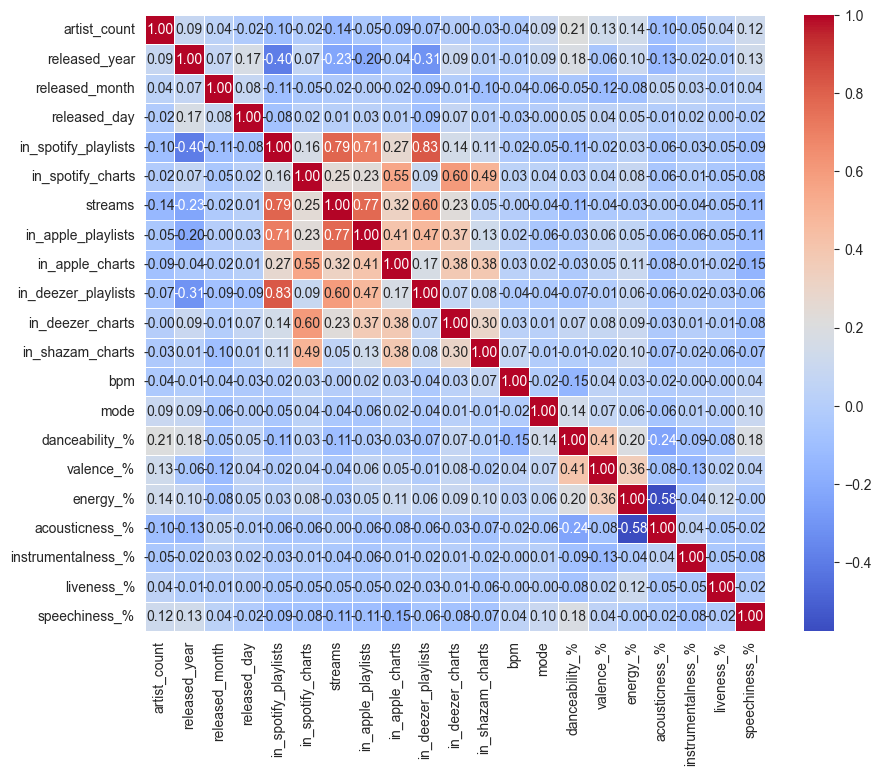

In [1133]:
def plot_correlation(df):
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.show()
plot_correlation(df_spotify)

- Removing features that are highly correlated with each other is very essential when it come to Machine Learning because if 2 features are highly correlated, then removing one of them will reduce the dimensionality and at the same time will not provide any additional information to the model.

In [1134]:
def remove_correlated_features(df, threshold, target_variable):
    # calculate the correlation matrix

    df = df.drop([target_variable, 'artist(s)_name', 'key'], axis=1)

    corr_matrix = df.corr()

    # doing iterations equal to the number of features
    for _ in df.columns.to_list():
        
        # set the correlation of the feature with itself to 0
        corr_matrix[corr_matrix == 1] = 0
        
        to_drop = None
        
        # get the features that are highly correlated with eachother
        correlated_features = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]
        print('The following features are correlated with eachother:\n', correlated_features)
        # if there are any correlated features grab the first one, if not break
        if len(correlated_features) > 0:
            to_drop = correlated_features[0]
        else:
            break
        
        print('The feature {} is highly correlated with another feature. Dropping it.\n'.format(to_drop))
        
        # drop the feature selected
        df = df.drop(to_drop, axis=1)
        
        # recalculate the correlation matrix
        corr_matrix = df.corr()

    return df
feature_selection_high_correlation = remove_correlated_features(df_spotify, 0.7, 'mode')
feature_selection_high_correlation.reset_index(drop=True, inplace=True)

The following features are correlated with eachother:
 ['in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_deezer_playlists']
The feature in_spotify_playlists is highly correlated with another feature. Dropping it.

The following features are correlated with eachother:
 ['streams', 'in_apple_playlists']
The feature streams is highly correlated with another feature. Dropping it.

The following features are correlated with eachother:
 []


## PCA Analaysis

- Finally, we apply PCA analysis to all numerical features in our dataset. First, we create PC columns equal to the number of numerical features. Then we plot the explained variance ration graph to visualize which PCs have the highest variance.
- As a result of PCA analysis, we found that the first 2 PC columns have the highest variance especially the first colum, so we reduced the dataset to 2 columns using PCA reduction. 

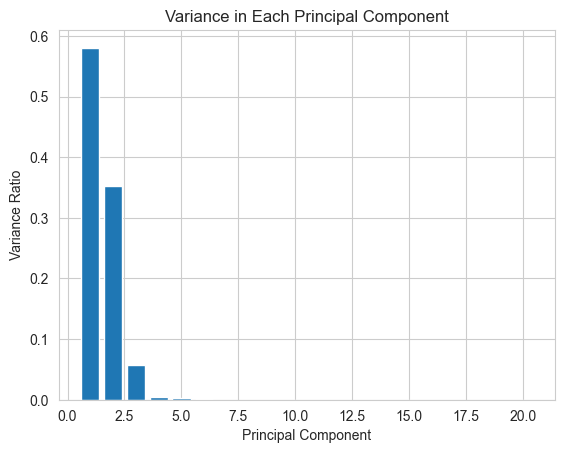

In [1135]:
def plot_variance(df, target_variable):
    df = df.drop([target_variable, 'artist(s)_name', 'key'], axis=1)
    pca = PCA()
    df_pca = pca.fit_transform(df)
    df_pca = pd.DataFrame(df_pca, columns=['PC'+ str(i) for i in range(1, len(df.columns)+1)])
    variance_ratio = pca.explained_variance_ratio_
    num_components = len(variance_ratio)
    plt.bar(range(1, num_components + 1), variance_ratio)
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Variance in Each Principal Component')
    plt.show()
    return df_pca

df_pca = plot_variance(df_spotify, 'mode')


In [1136]:
def apply_PCA(df, target_variable, n_components, flag):
    if flag == True:
        df = df.drop([target_variable, 'artist(s)_name', 'key'], axis=1)
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(df)
    df_pca = pd.DataFrame(df_pca, columns=['PC'+ str(i) for i in range(1, n_components+1)])
    return df_pca
df_pca = apply_PCA(df_spotify, 'mode', 2, True)
df_pca

,PC1,PC2
0,-4.431275,-1.668519
1,-7.619489,6.619186
2,-10.286434,13.181055
3,-4.050477,8.191586
4,-5.836265,2.009148
...,...,...
947,0.435210,-11.434537
948,-6.161276,5.267582
949,0.424619,-11.434822
950,-5.811174,4.334108


# Clustering

### Dunn-Index

- The Dunn Index is a metric used to evaluate the performance of clustering algorithms. It is calculated by taking the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. A higher Dunn Index value indicates better-defined and more compact clusters.
- The following function calculates the Dunn-Index.
- When we call the method 'apply_KMeans', we print the Dunn-Index for every dataframe at we find that the Domain Knowledge resulted in the best score (k=2).

In [1137]:
def dunn_index(X, labels):
    distances = euclidean_distances(X)
    unique_labels = np.unique(labels)

    inter_cluster_distances = []
    intra_cluster_distances = []

    for label in unique_labels:
        intra_cluster_distances.append(distances[labels == label][:, labels == label].max())

        for other_label in unique_labels:
            if label != other_label:
                inter_cluster_distances.append(distances[labels == label][:, labels == other_label].min())

    return min(inter_cluster_distances) / max(intra_cluster_distances)


## K-Means Clustering

- K-Means is a popular partitioning clustering algorithm that partitions a dataset into K distinct, non-overlapping subgroups or clusters. The algorithm aims to minimize the within-cluster variance, where each cluster is represented by its centroid. It operates by iteratively assigning data points to clusters based on their proximity to the cluster centroids and updating the centroids until convergence.
- What we are trying to do is that we apply K-Means using different k values and then evaluate the model to find the best k. This will be done for the 4 different feature extractions mentioned above (Low Variance Removal, Removal of High Correlations, PCA, and Domain Knowledge).
- The goal is to find the best dataframe for the K-Means Clustering

In [1138]:
def apply_KMeans(df):
    avg_silhouette = []
    dunn = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        dunn_i = dunn_index(df, cluster_labels)
        dunn.append(dunn_i)
        silhouette_avg = silhouette_score(df, cluster_labels)
        avg_silhouette.append(silhouette_avg)
    print("Silhouette scores: ", avg_silhouette)
    print("Dunn Index scores: ", dunn)
    return df, avg_silhouette
df_spotify_kmeans, avg_silhouette1 = apply_KMeans(feature_selection_low_variance)

Silhouette scores:  [0.7203108829290629, 0.47814854022113484, 0.48775085220676445, 0.3544418596863807, 0.36782133613095913, 0.3209989373943191, 0.3168969291238528, 0.32801461251210845, 0.3358468625625371]
Dunn Index scores:  [0.03032027666395154, 0.01769954401146548, 0.022273141150215715, 0.022273141145056064, 0.022230867721285248, 0.022216758705217256, 0.02481776666049557, 0.02475494272586135, 0.02475494272586135]


In [1139]:
df_spotify_kmeans, avg_silhouette2 = apply_KMeans(feature_selection_high_correlation)

Silhouette scores:  [0.7182173694715669, 0.4718039575137818, 0.4809597581340057, 0.3453932584980903, 0.35579774346390153, 0.30554861013342544, 0.3127322003400633, 0.3169958246311483, 0.30098363943939044]
Dunn Index scores:  [0.03445594840503596, 0.01859234182747442, 0.03390452887663264, 0.024496803127754554, 0.02370769284722586, 0.032162076568934404, 0.026127298947231665, 0.02447001819560386, 0.026410367499009088]


In [1140]:
df_spotify_kmeans, avg_silhouette3 = apply_KMeans(df_pca)

Silhouette scores:  [0.7427777028223721, 0.5600367669898348, 0.5738823449964374, 0.4765297990239757, 0.500928272062244, 0.47266897092061233, 0.4749494403382907, 0.4773105283347075, 0.498159738239055]
Dunn Index scores:  [0.015246213136302948, 0.011145943225211414, 0.016331167855425512, 0.015566705384341635, 0.015566705384341635, 0.01646570705248196, 0.01878061480241461, 0.025554032289488156, 0.01878061480241461]


In [1141]:
df_spotify_kmeans, avg_silhouette4 = apply_KMeans(df_percentages)

Silhouette scores:  [0.31954924282395825, 0.2553811866741692, 0.22807058259608376, 0.22236928413817958, 0.18703582869492286, 0.17663011544606105, 0.17969243082995673, 0.1783095078848192, 0.17632272683958064]
Dunn Index scores:  [0.060199437757846586, 0.03859207074809012, 0.03859207074809012, 0.03859207074809012, 0.03800880385857858, 0.024141009057863885, 0.03852006480297236, 0.02927560814506677, 0.04442186825844403]


### Silhouette-Score

- The Silhouette Score is a measure of how well-defined the clusters are in a clustering algorithm. It quantifies how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high Silhouette Score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
- Here we plot the Silhouette-Score for every K-Means using the 4 dataframe mentioned above.
- We can observe the PCA has the best Silhoutte-Score (k=2). 

In [1142]:
def plot_silhouette(avg_silhouette1, avg_silhouette2, avg_silhouette3, avg_silhouette4):
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    axs[0].plot(range(2, 11), avg_silhouette1, 'bx-')
    axs[0].set_xlabel('Values of K')
    axs[0].set_ylabel('Silhouette score')
    axs[0].set_title('Low Variance Features')
    
    axs[1].plot(range(2, 11), avg_silhouette2, 'bx-')
    axs[1].set_xlabel('Values of K')
    axs[1].set_ylabel('Silhouette score')
    axs[1].set_title('Highly Correlated Features')
    
    axs[2].plot(range(2, 11), avg_silhouette3, 'bx-')
    axs[2].set_xlabel('Values of K')
    axs[2].set_ylabel('Silhouette score')
    axs[2].set_title('PCA')

    axs[3].plot(range(2, 11), avg_silhouette4, 'bx-')
    axs[3].set_xlabel('Values of K')
    axs[3].set_ylabel('Silhouette score')
    axs[3].set_title('Percentages')
    
    plt.tight_layout()
    plt.show()

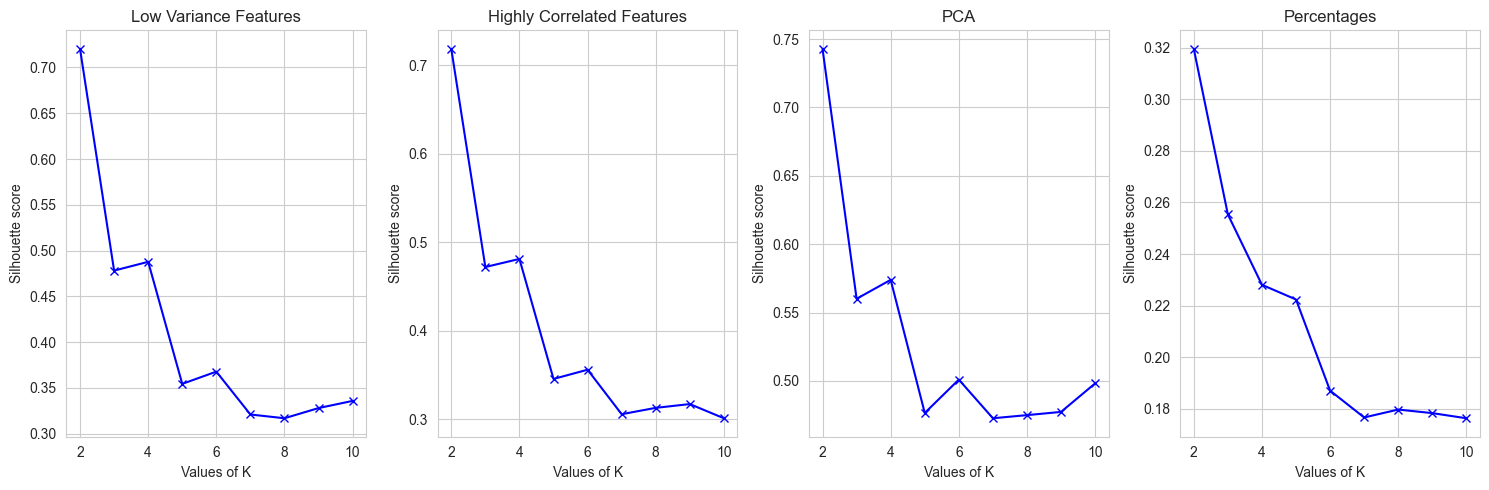

In [1143]:
plot_silhouette(avg_silhouette1, avg_silhouette2, avg_silhouette3, avg_silhouette4)

### Elbow Method

- The Elbow Method is a technique used in clustering analysis to determine the optimal number of clusters for a dataset. It involves running a clustering algorithm with an increasing number of clusters and plotting the variance or distortion as a function of the number of clusters. The "elbow" in the plot represents the point where adding more clusters does not significantly improve the model's performance, helping to identify the optimal number of clusters.
- Here we plot the Elbow-Graph for the K-Means using the same 4 datasets and we observe that for all 4 dataframes it say the best is (k=3).

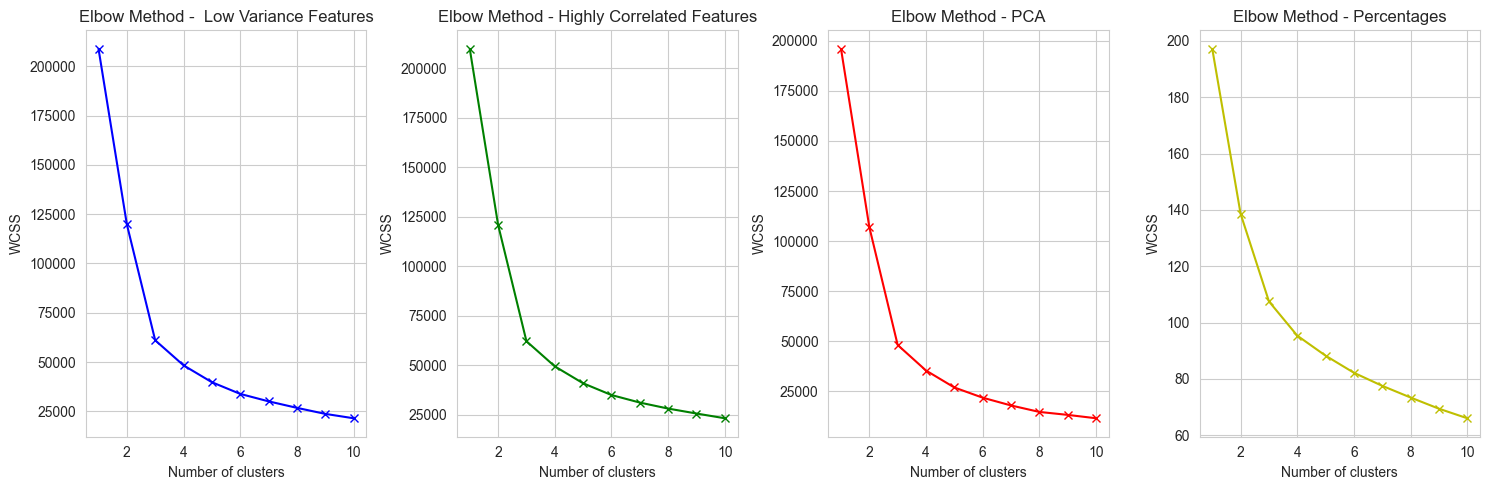

In [1144]:
def elbow_method(df1, df2, df3, df4):
    wcss1 = []
    wcss2 = []
    wcss3 = []
    wcss4 = []
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    for i in range(1, 11):
        kmeans1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans1.fit(df1)
        wcss1.append(kmeans1.inertia_)
        
        kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans2.fit(df2)
        wcss2.append(kmeans2.inertia_)
        
        kmeans3 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans3.fit(df3)
        wcss3.append(kmeans3.inertia_)

        kmeans4 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans4.fit(df4)
        wcss4.append(kmeans4.inertia_)
    
    axs[0].plot(range(1, 11), wcss1, 'bx-', label='Dataframe 1')
    axs[0].set_title('Elbow Method -  Low Variance Features')
    axs[0].set_xlabel('Number of clusters')
    axs[0].set_ylabel('WCSS')
    
    axs[1].plot(range(1, 11), wcss2, 'gx-', label='Dataframe 2')
    axs[1].set_title('Elbow Method - Highly Correlated Features')
    axs[1].set_xlabel('Number of clusters')
    axs[1].set_ylabel('WCSS')
    
    axs[2].plot(range(1, 11), wcss3, 'rx-', label='Dataframe 3')
    axs[2].set_title('Elbow Method - PCA')
    axs[2].set_xlabel('Number of clusters')
    axs[2].set_ylabel('WCSS')

    axs[3].plot(range(1, 11), wcss4, 'yx-', label='Dataframe 4')
    axs[3].set_title('Elbow Method - Percentages')
    axs[3].set_xlabel('Number of clusters')
    axs[3].set_ylabel('WCSS')
    
    plt.tight_layout()
    plt.show()

elbow_method(feature_selection_low_variance, feature_selection_high_correlation, df_pca, df_percentages)

- Since PCA gave the best results so far for K-Means, we apply the K-Means using k=2 because the mode feature has only 2 categories to be able to compare them.

In [1145]:
def apply_best_KMeans(df):
    kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit_predict(df)
    cluster_labels = kmeans.labels_
    return df, cluster_labels, kmeans
df_spotify_kmeans, cluster_labels, km = apply_best_KMeans(df_pca)

In [1146]:
df_comparison = pd.DataFrame({'mode': df_spotify['mode'], 'cluster_labels': cluster_labels})
def calculate_same_value_percentage(df, column1, column2):
    total_rows = len(df)
    same_value_rows = len(df[df[column1] == df[column2]])
    percentage = (same_value_rows / total_rows) * 100
    return percentage
perc_kmeans = calculate_same_value_percentage(df_comparison, 'mode', 'cluster_labels')

- Here we visualize the cluster labels against the original labels.
- The yellow points are 0 or Major, and the black points are 1 or Minor.

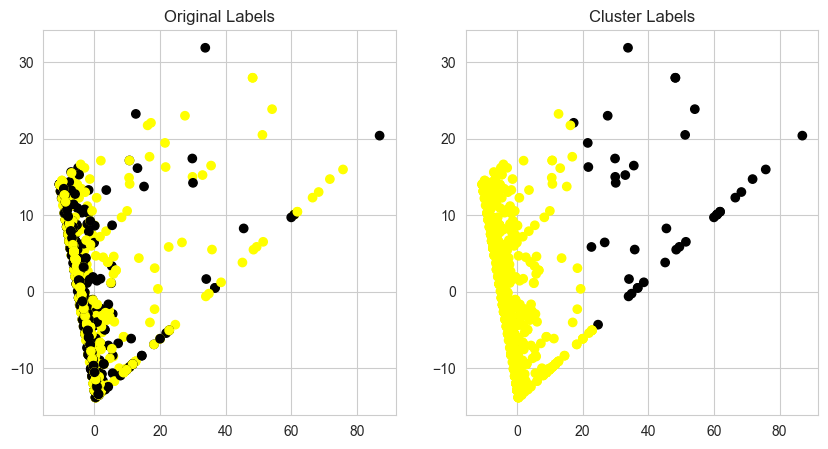

In [1147]:
def plot_clusters_vs_groundtruth(df, cluster_labels, target_variable, df_original):
    cmap = mcolors.ListedColormap(['yellow', 'black'])
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df_original[target_variable], cmap=cmap)
    plt.title('Original Labels')

    # Plot cluster labels
    plt.subplot(1, 2, 2)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap=cmap)
    plt.title('Cluster Labels')

    plt.show()

plot_clusters_vs_groundtruth(df_pca, cluster_labels, 'mode', df_spotify)

## Hierarchical Clustering

- Hierarchical Clustering is a family of clustering algorithms that build a hierarchy of clusters. It can be agglomerative (bottom-up) or divisive (top-down). In agglomerative hierarchical clustering, each data point starts as a separate cluster, and pairs of clusters are successively merged based on their similarity until a single cluster containing all data points is formed. In divisive hierarchical clustering, the process is reversed, starting with all data points in one cluster and successively splitting them into smaller clusters. The result is often visualized using a dendrogram, a tree-like structure that illustrates the relationships between clusters at different levels of the hierarchy.
- What we are trying to do is that we apply Hierarchical Clustering using different k values and then evaluate the model to find the best k. This will be done for the 4 different feature extractions mentioned above (Low Variance Removal, Removal of High Correlations, PCA, and Domain Knowledge).
- The goal is to find the best dataframe for the Hierarchical Clustering.

In [1148]:
def apply_hierarchical_clustering(df):
    silhouette_scores = []
    dunn = []
    for i in range (2, 11):
        hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage ='ward')
        hc = hc.fit(df)
        cluster_labels = hc.labels_
        dunn_i = dunn_index(df, cluster_labels)
        dunn.append(dunn_i)
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    print("Silhouette scores: ", silhouette_scores)
    print("Dunn Index scores: ", dunn)
    return silhouette_scores
silhouette_avg1 = apply_hierarchical_clustering(feature_selection_low_variance)


Silhouette scores:  [0.6922361700251847, 0.4542981885180977, 0.45275552693433163, 0.4404202885862915, 0.34870414878731826, 0.35488480041715, 0.3046716526191768, 0.3190231438828785, 0.32715734229407184]
Dunn Index scores:  [0.06923041615955194, 0.018322993832312368, 0.030826122832669525, 0.030826122832669525, 0.030554331128729083, 0.042053313627404484, 0.02993496379199117, 0.02993496379199117, 0.02993496379199117]


### Dunn-Index

- When we call the method 'apply_hierarchical_clustering', we print the Dunn-Index for every dataframe at we find that the PCA resulted in the best score (k=2).

In [1149]:
silhouette_avg2 = apply_hierarchical_clustering(feature_selection_high_correlation)

Silhouette scores:  [0.7323602310555078, 0.4673655988967789, 0.44521062255669724, 0.4543334628250297, 0.33755063027878385, 0.33891267622361715, 0.2716785301744903, 0.27673485672337617, 0.28484691697439685]
Dunn Index scores:  [0.10826158941009016, 0.02587712873714252, 0.02587712873714252, 0.02587712873714252, 0.02587712873714252, 0.04442348647531367, 0.04442348647531367, 0.03680623555642586, 0.03680623555642586]


In [1150]:
silhouette_avg3 = apply_hierarchical_clustering(df_pca)

Silhouette scores:  [0.7627137826749409, 0.5215365164692526, 0.5504187778080689, 0.5535371052053999, 0.4734734471298546, 0.4297184459601766, 0.43097108621172076, 0.4555952036368273, 0.46660225838674974]
Dunn Index scores:  [0.15471592665887454, 0.014252031280589186, 0.014252031280589186, 0.014252031280589186, 0.014252031280589186, 0.014252031280589186, 0.020592258145466804, 0.020592258145466804, 0.020592258145466804]


In [1151]:
silhouette_avg4 = apply_hierarchical_clustering(df_percentages)

Silhouette scores:  [0.304041012728545, 0.17407053309456552, 0.1667600639708884, 0.13115488454962124, 0.13993835558822737, 0.11580134551204381, 0.11334414359843593, 0.1189803843880196, 0.1252238758553201]
Dunn Index scores:  [0.09136134220841614, 0.056588583968692846, 0.056588583968692846, 0.056588583968692846, 0.0626546609470288, 0.0626546609470288, 0.0626546609470288, 0.07792347839367103, 0.0800472549511215]


### Silhouette-Score

- Here we plot the Silhouette-Score for every Hierarchical using the 4 dataframe mentioned above.
- We can observe the PCA has the best Silhoutte-Score (k=2). 

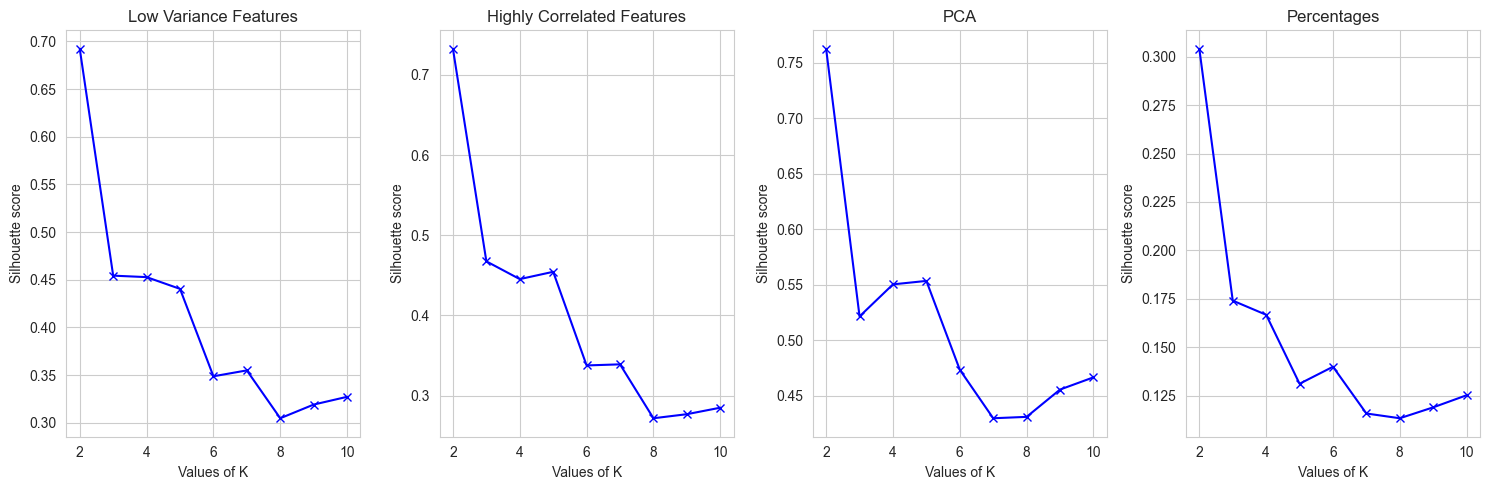

In [1152]:
plot_silhouette(silhouette_avg1, silhouette_avg2, silhouette_avg3, silhouette_avg4)

### Dendrogram

- A dendrogram is a tree-like diagram that represents the hierarchical clustering of data. It is commonly used in hierarchical clustering algorithms. The vertical lines in a dendrogram represent the observations, and the height of the horizontal lines represents the distance (or dissimilarity) between the clusters at different levels of the hierarchy. Dendrograms provide a visual representation of how the data is grouped and the relationships between clusters.
- Here we plot the Dendrogram and we find that for all dataframe is says (k=2) is the best except for the Domain Knowledge which says (k=1).

In [1153]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
def model_for_dendrogram(df):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(df)
    return model

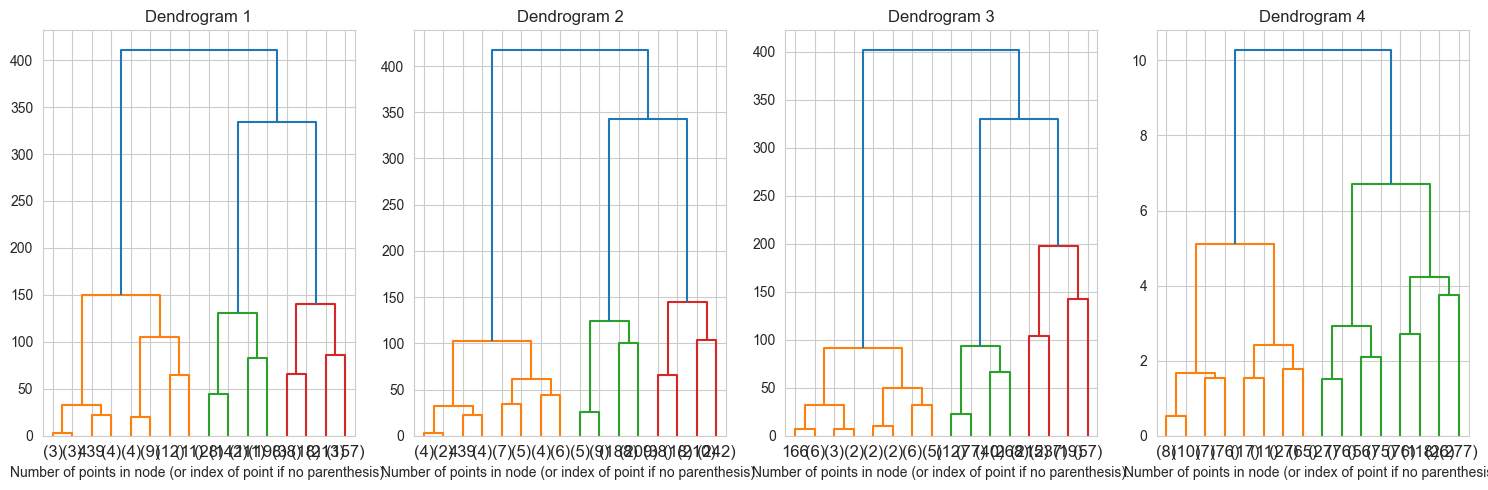

In [1154]:
import matplotlib.pyplot as plt

def plot_dendrogram_subplot(models):
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    for i, model in enumerate(models):
        axs[i].set_title(f"Dendrogram {i+1}")
        axs[i].set_xlabel("Number of points in node (or index of point if no parenthesis).")
        plot_dendrogram(model, truncate_mode="level", p=3, ax=axs[i])
    
    plt.tight_layout()
    plt.show()

# Usage example:
models = [
    model_for_dendrogram(feature_selection_low_variance),
    model_for_dendrogram(feature_selection_high_correlation),
    model_for_dendrogram(df_pca),
    model_for_dendrogram(df_percentages)
]

plot_dendrogram_subplot(models)

- Since PCA gave the best results so far for Hierarchical Clustering, we apply the Hierarchical Clustering using k=2 because the mode feature has only 2 categories to be able to compare them.

In [1155]:
def apply_best_hierarchical_clustering(df):
    hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward')
    cluster_labels = hc.fit_predict(df)
    return cluster_labels
cluster_labels = apply_best_hierarchical_clustering(df_pca)

In [1156]:
df_comparison = pd.DataFrame({'mode': df_spotify['mode'], 'cluster_labels': cluster_labels})
perc_hierarchical = calculate_same_value_percentage(df_comparison, 'mode', 'cluster_labels')

- Here we visualize the cluster labels against the original labels.
- The yellow points are 0 or Major, and the black points are 1 or Minor.

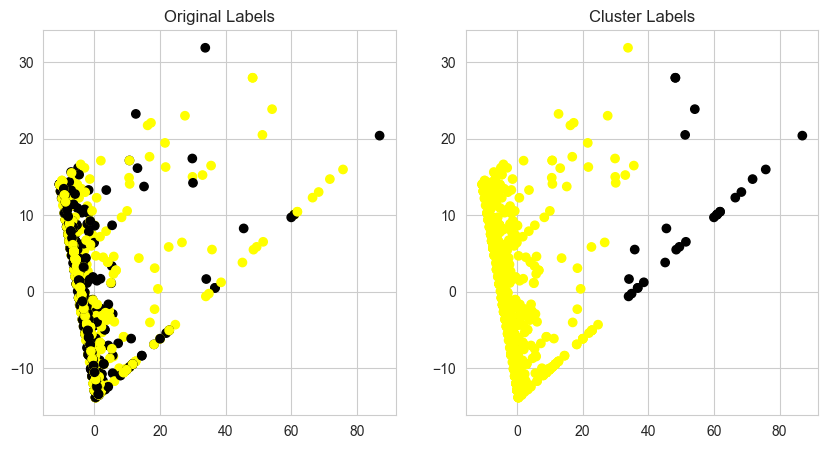

In [1157]:
plot_clusters_vs_groundtruth(df_pca, cluster_labels, 'mode', df_spotify)

## K-Modes

- K-Modes is an extension of K-Means that is specifically designed for categorical data. Unlike K-Means, which works well with numerical data, K-Modes identifies clusters based on the modes (most frequent values) of categorical attributes. The algorithm minimizes the dissimilarity between data points and cluster modes, and it iteratively updates the modes to form meaningful clusters of categorical data.
- This time we will only use 1 dataframe to evaluate K-Mode. This dataframe is the one that we extracted at the beginning of the feature extraction section. The dataframe that has the 'key' feature.
- We will evaluate with different k values to see which one is the best.

In [1158]:
def apply_kmodes(df):
    np.random.seed(0)
    cost = []
    K = range(2, 11)
    for num_clusters in K:
        kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
        kmode.fit_predict(df)
        cost.append(kmode.cost_)
    return avg_silhouette, cost

avg_silhouette, cost = apply_kmodes(categorical_features)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 81, cost: 656.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 641.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 664.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 646.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 91, cost: 557.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, 

### Elbow Method

- Here we can see that the Elbow Method says that k=7 is the best.

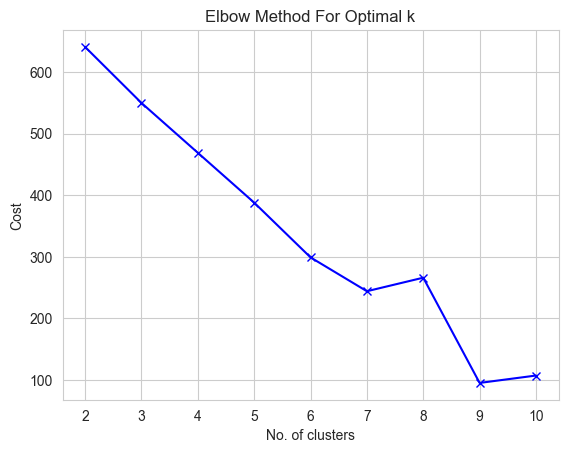

In [1159]:
def plot_elbow_method_kmodes(cost):
    plt.plot(range(2,11), cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k')
    plt.show()
plot_elbow_method_kmodes(cost)

- We will apply the K-Modes using k=2 because the mode feature has only 2 categories to be able to compare them.

In [1160]:
def apply_kmodes_2(df):
    np.random.seed(0) # set seed
    kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cluster_labels = kmode.labels_
    return cluster_labels
cluster_labels = apply_kmodes_2(categorical_features)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 81, cost: 656.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 641.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 664.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 646.0
Best run was number 3


In [1161]:
df_comparison = pd.DataFrame({'mode': df_spotify['mode'], 'cluster_labels': cluster_labels})
perc_kmodes = calculate_same_value_percentage(df_comparison, 'mode', 'cluster_labels')

- Here we visualize the cluster labels against the original labels.
- The yellow points are 0 or Major, and the black points are 1 or Minor.

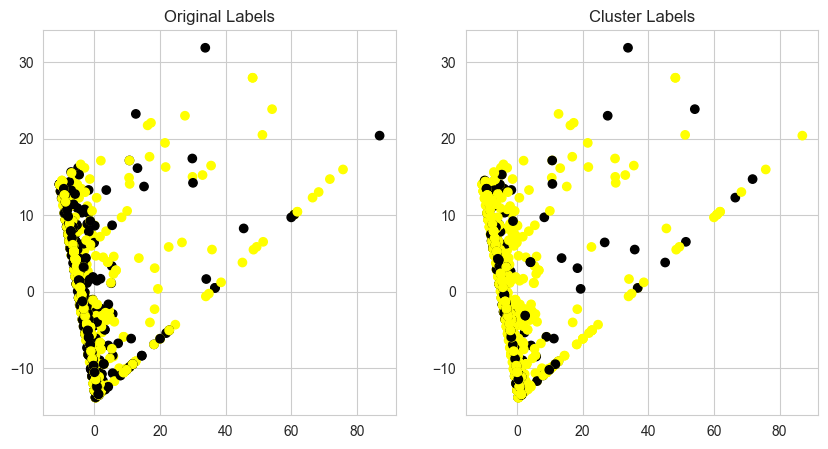

In [1162]:
plot_clusters_vs_groundtruth(df_pca, cluster_labels, 'mode', df_spotify)

# Clustering Result

- After choosing the best dataframe for each clustering algorithm, we compare the cluster labels with the original values for the 3 clustering algorithms.
- We find the K-Modes is the worst, then K-Means is the second best, and finally Hierarchical Clustering is the best.

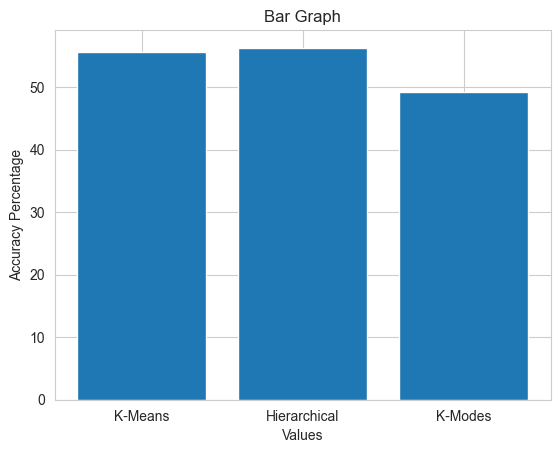

In [1163]:
import matplotlib.pyplot as plt

def plot_bar_graph(values):
    labels = ['K-Means', 'Hierarchical', 'K-Modes']
    plt.bar(labels, values)
    plt.xlabel('Values')
    plt.ylabel('Accuracy Percentage')
    plt.title('Bar Graph')
    plt.show()
plot_bar_graph([perc_kmeans, perc_hierarchical, perc_kmodes])

# Classification

## Data Splitting and Hyperparameters

This function, `split_data`, is used to split a dataset into training and testing sets.

Here's a step-by-step explanation:

1. The function takes three arguments: `df` (the DataFrame of features to be used for training and testing), `target_variable` (the name of the target variable column), and `df_original` (the original DataFrame which contains the target variable).

2. `X` is assigned the DataFrame of features, `df`.

3. `Y` is assigned the target variable column from the original DataFrame, `df_original`.

4. The `train_test_split` function from `sklearn.model_selection` is used to split `X` and `Y` into training and testing sets. The `test_size` parameter is set to 0.3, meaning that 30% of the data will be used for testing. The `train_size` parameter is set to 0.7, meaning that 70% of the data will be used for training. The `random_state` parameter is set to 7 for reproducibility of results. The `shuffle` parameter is set to `True` to shuffle the dataset before splitting. The `stratify` parameter is set to `Y` to maintain the same proportions of the target variable in both the training and testing sets as in the original dataset.

5. The function returns the training and testing sets: `X_train`, `X_test`, `Y_train`, `Y_test`.

- This function will be called for the 4 dataframes mentioned before (Low Variance Removal Features, Removal of High Correlation Features, PCA, and Domain Knowledge).
- Then we will apply 3 different classification algorithms for each of them.

In [1164]:
def split_data(df, target_variable, df_original):
    X = df
    Y = df_original[target_variable]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, 
        test_size=0.3, 
        train_size=0.7,
        random_state=7,
        shuffle=True,
        stratify=Y
    )
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = split_data(feature_selection_low_variance, 'mode', df_spotify)

## Logistic Regression

- Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical and has two classes (e.g., 0 or 1, Yes or No). Despite its name, logistic regression is used for classification rather than regression. The algorithm models the relationship between the independent variables and the probability of belonging to a particular class using the logistic function. It produces a probability score that is then transformed into a binary outcome based on a chosen threshold.
- Our goal is to apply Logistic Regression on the 4 dataframe and see which one is better according to some evaluation metrics.
- These evaluation metrics are:
    1. Accuracy: Accuracy measures the overall correctness of the model, representing the ratio of correctly predicted instances to the total instances.
    2. Precision: Precision is the ability of the classifier not to label as positive a sample that is negative.
    3. Recall: Recall measures the ability of the classifier to capture all the positive instances.
    4. F1 Score: The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.
    5. Mean Average Precision (MAP): MAP is often used in information retrieval and measures the average precision across multiple queries.
    6. Area Under the ROC Curve (ROC AUC): ROC AUC measures the area under the Receiver Operating Characteristic curve, which represents the trade-off between true positive rate and false positive rate

In [1165]:
def logistic_regression(X_train, X_test, Y_train, Y_test):
    # Create a logistic regression model
    log_model = LogisticRegression()

    # Train the model
    log_model.fit(X_train, Y_train)

    # Make predictions on the test data
    predictions = log_model.predict(X_test)

    # Get the accuracy score
    accuracy = accuracy_score(Y_test, predictions)
    print('Accuracy:', accuracy)

    recall = recall_score(Y_test, predictions)
    print('Recall:', recall)

    precision = precision_score(Y_test, predictions)
    print('Precision:', precision)

    f1 = f1_score(Y_test, predictions)
    print('F1 Score:', f1)

    average_precision = average_precision_score(Y_test, predictions)
    print('Mean Average Precision:', average_precision)
    
    return log_model, predictions, precision, accuracy, recall, f1

log_model, predictions, lr_precision, lr_accuracy, lr_recall, lr_f1 = logistic_regression(X_train, X_test, Y_train, Y_test)

Accuracy: 0.5629370629370629
Recall: 0.08264462809917356
Precision: 0.4166666666666667
F1 Score: 0.13793103448275862
Mean Average Precision: 0.4225471498198771


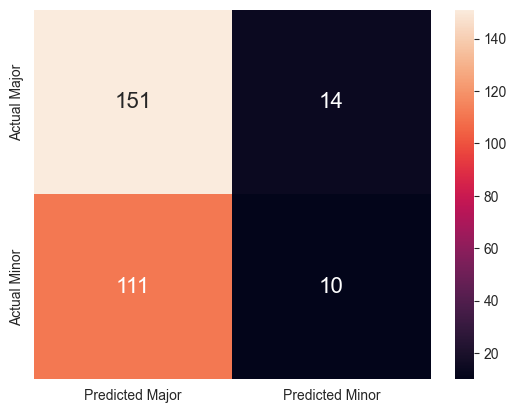

In [1166]:
def plot_confusion_matrix(Y_test, predictions):
    # calculate the confusion matrix
    conf_mat = sk_confusion_matrix(Y_test, predictions)

    conf_frame = pd.DataFrame(conf_mat, 
                            columns=['Predicted Major', 'Predicted Minor'], 
                            index=['Actual Major', 'Actual Minor'])

    sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
    plt.show()
plot_confusion_matrix(Y_test, predictions)


ROC AUC Score: 0.4472827448034059


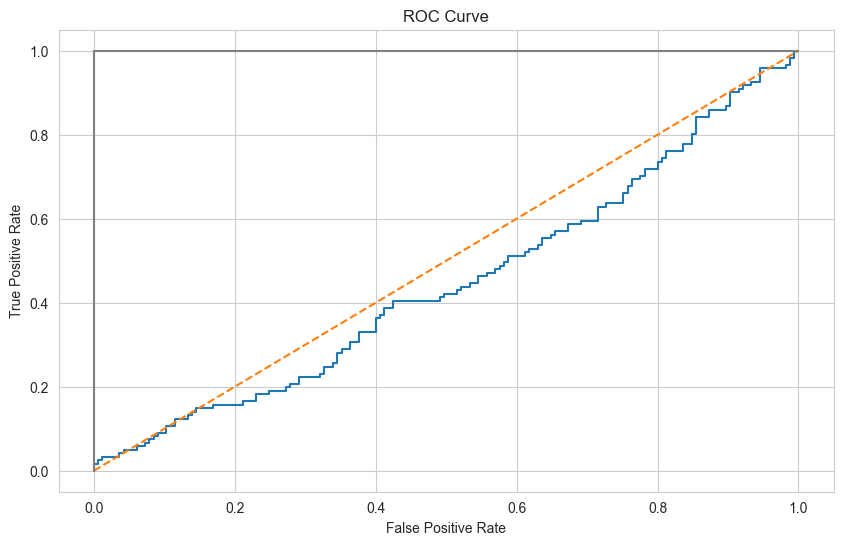

In [1167]:
def plot_roc_curve(log_model, X_test, Y_test):
    # Get the predicted probabilities
    y_pred_prob = log_model.predict_proba(X_test)[:,1]

    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, y_pred_prob)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('ROC AUC Score:', roc_auc)

    # Plot ROC curve
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0,1], ls='--')
    plt.plot([0,0],[1,0], c='.5')
    plt.plot([1,1], c='.5')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc_curve(log_model, X_test, Y_test)

Accuracy: 0.5314685314685315
Recall: 0.2066115702479339
Precision: 0.3968253968253968
F1 Score: 0.2717391304347826
Mean Average Precision: 0.4176530540166904


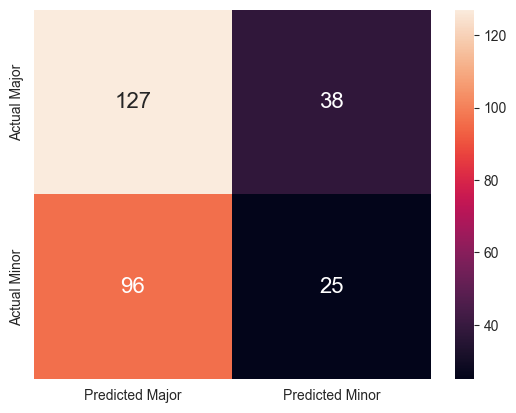

In [1168]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_high_correlation, 'mode', df_spotify)
log_model, predictions, lr_precision, lr_accuracy, lr_recall, lr_f1 = logistic_regression(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5165038817931381


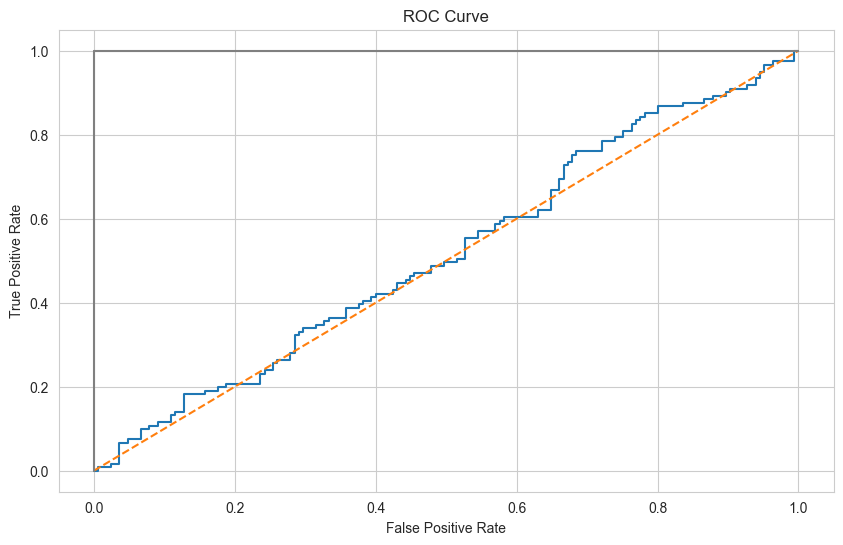

In [1169]:
plot_roc_curve(log_model, X_test, Y_test)

Accuracy: 0.5769230769230769
Recall: 0.0
Precision: 0.0
F1 Score: 0.0
Mean Average Precision: 0.4230769230769231


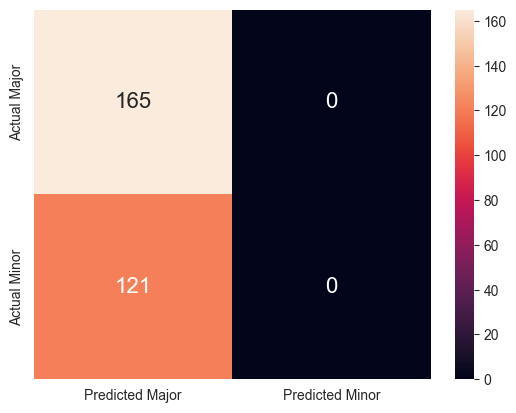

In [1170]:
X_train, X_test, Y_train, Y_test = split_data(df_pca, 'mode', df_spotify)
log_model, predictions, lr_precision, lr_accuracy, lr_recall, lr_f1 = logistic_regression(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5064863511144503


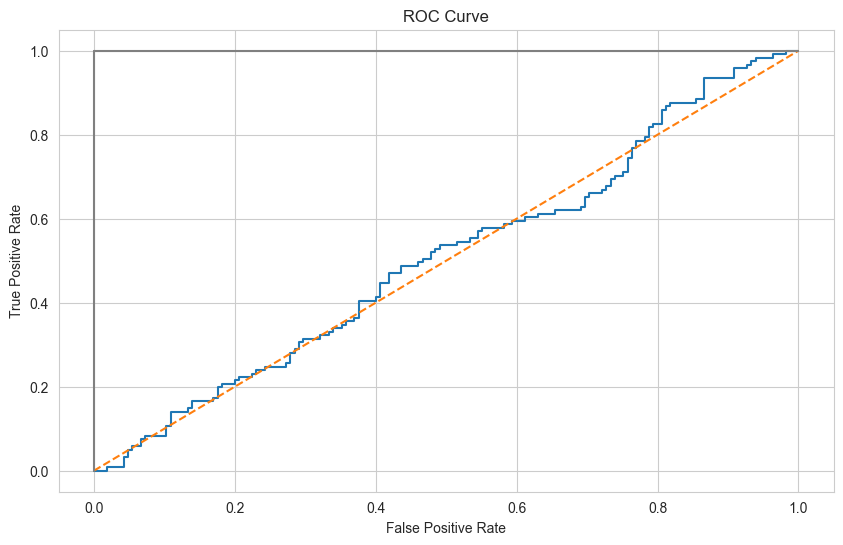

In [1171]:
plot_roc_curve(log_model, X_test, Y_test)

Accuracy: 0.5804195804195804
Recall: 0.12396694214876033
Precision: 0.5172413793103449
F1 Score: 0.2
Mean Average Precision: 0.43475020277528115


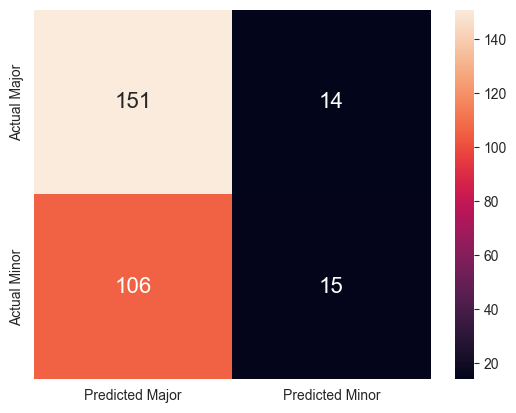

In [1172]:
X_train, X_test, Y_train, Y_test = split_data(df_percentages, 'mode', df_spotify)
log_model, predictions, lr_precision, lr_accuracy, lr_recall, lr_f1 = logistic_regression(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5823691460055097


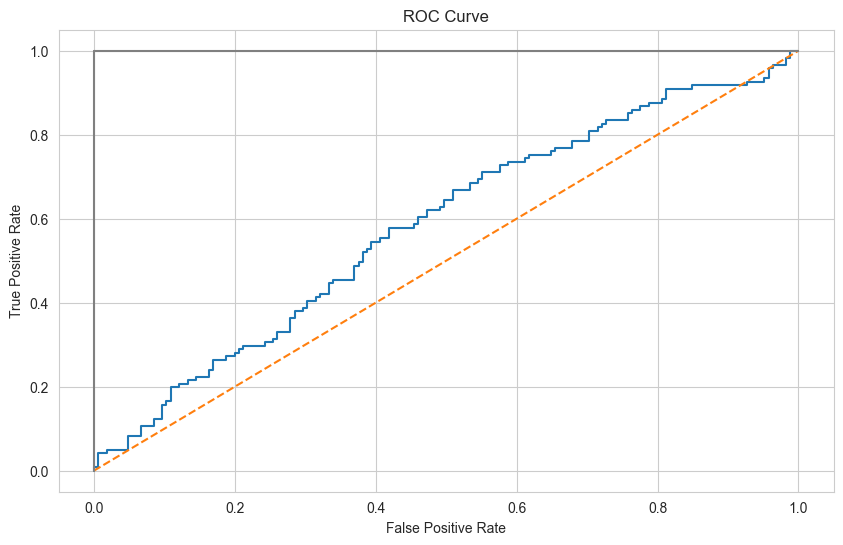

In [1173]:
plot_roc_curve(log_model, X_test, Y_test)

- After applying Logistic Regression to all 4 datafarme, we can observe that teh best dataframe was the Domain Knowledge. 
- If we look at the ROC graph, Confusion Matrix, and the other evaluation metrics (printed when calling the function each time) we will observe that it gave the best results for the Domain Knowledge.
- Since it is the best, here is the visualization of the decision boundary along with the original data points.

## Visualizing Decision Boundry

- Visualizing decision boundry will not be accurate because to plot the graph, we must select only 2 features from the dataframe and train the model with them and that will not give the same results of training the model with the whole dataframe. 
- The function plots a graph were the red and blue backgrounds represent the predicted labels (0 and 1 respectively). The red and blue points are the actual labels (0 and 1 respectively).

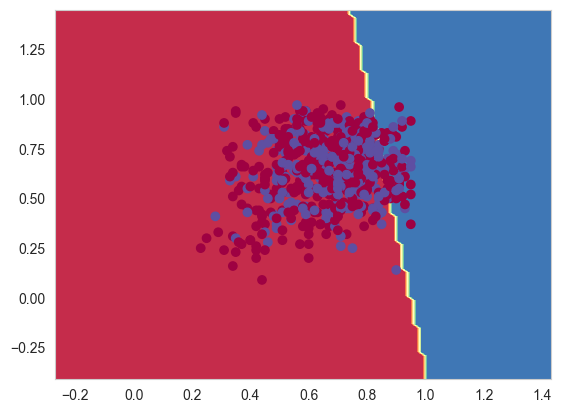

In [1174]:
def plot_decision_boundry(X_train, Y_train, flag):
    if flag == 0:
        model = LogisticRegression()
    elif flag == 1:
        model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
    elif flag == 2:
        model = GaussianNB()
    model.fit(X_train.iloc[:, :2], Y_train)

    # Create a mesh to plot in
    x_min, x_max = X_train.iloc[:, 0].min() - .5, X_train.iloc[:, 0].max() + .5
    y_min, y_max = X_train.iloc[:, 1].min() - .5, X_train.iloc[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, cmap=plt.cm.Spectral)
    plt.show()
plot_decision_boundry(X_train, Y_train, 0)

## Random Forest

-  Random Forest is an ensemble learning method used for both classification and regression tasks. It builds multiple decision trees during training and merges their predictions to obtain a more accurate and stable result. Each tree is trained on a random subset of the data and features. Random Forest helps reduce overfitting and improve generalization by combining the strengths of individual decision trees. It's a versatile and powerful algorithm known for its robustness and performance.
- Our goal is to apply Random Forest on the 4 dataframe and see which one is better according to the same evaluation metrics mentioned above.

In [1175]:
def random_forest(X_train, X_test, Y_train, Y_test):
    # Create a random forest classifier

    rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

    # Train the model

    rf_model.fit(X_train, Y_train)

    # Make predictions on the test data

    predictions = rf_model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)
    print('Accuracy:', accuracy)

    recall = recall_score(Y_test, predictions)
    print('Recall:', recall)

    precision = precision_score(Y_test, predictions)
    print('Precision:', precision)

    f1 = f1_score(Y_test, predictions)
    print('F1 Score:', f1)

    average_precision = average_precision_score(Y_test, predictions)
    print('Mean Average Precision:', average_precision)

    return rf_model, predictions, accuracy, recall, precision, f1

Accuracy: 0.5594405594405595
Recall: 0.024793388429752067
Precision: 0.2727272727272727
F1 Score: 0.04545454545454545
Mean Average Precision: 0.41934924579552674


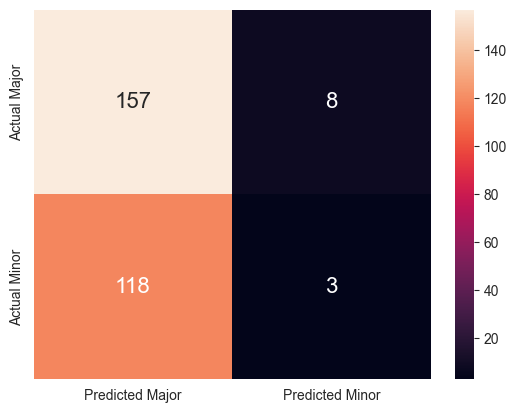

In [1176]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_low_variance, 'mode', df_spotify)
rf_model, predictions, rf_accuracy, rf_recall, rf_precision, rf_f1 = random_forest(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.4917104933633859


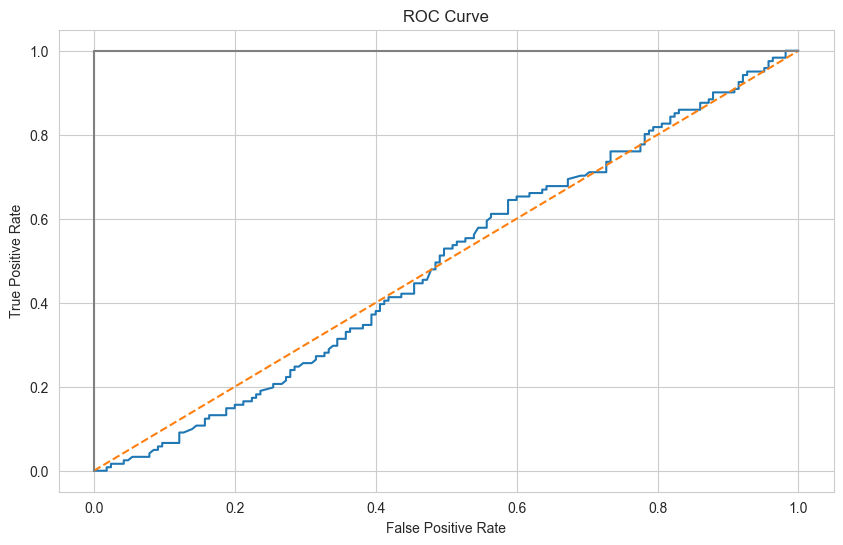

In [1177]:
plot_roc_curve(rf_model, X_test, Y_test)

Accuracy: 0.5384615384615384
Recall: 0.01652892561983471
Precision: 0.13333333333333333
F1 Score: 0.029411764705882356
Mean Average Precision: 0.4182877728332274


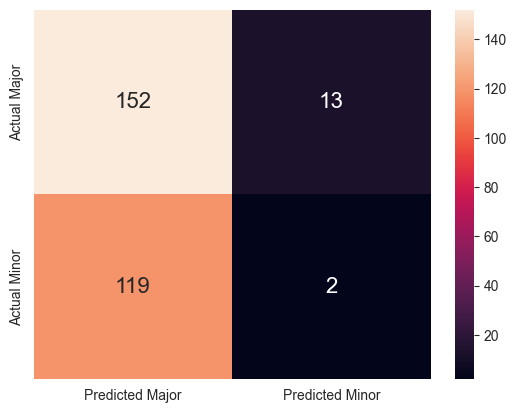

In [1178]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_high_correlation, 'mode', df_spotify)
rf_model, predictions, rf_accuracy, rf_recall, rf_precision, rf_f1 = random_forest(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5585775106436264


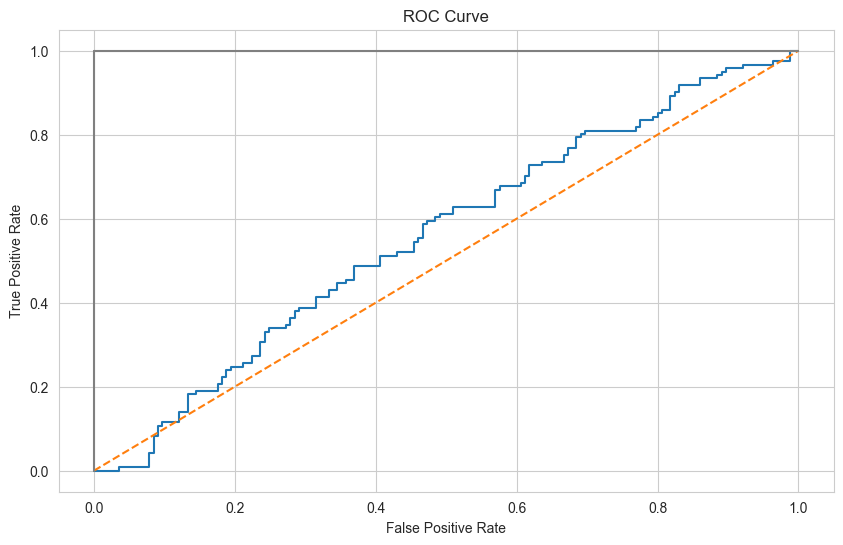

In [1179]:
plot_roc_curve(rf_model, X_test, Y_test)

Accuracy: 0.5664335664335665
Recall: 0.03305785123966942
Precision: 0.36363636363636365
F1 Score: 0.06060606060606061
Mean Average Precision: 0.4211119459053343


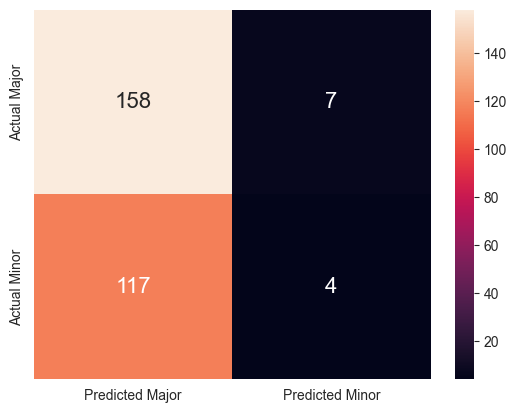

In [1180]:
X_train, X_test, Y_train, Y_test = split_data(df_pca, 'mode', df_spotify)
rf_model, predictions, rf_accuracy, rf_recall, rf_precision, rf_f1 = random_forest(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5451289757074881


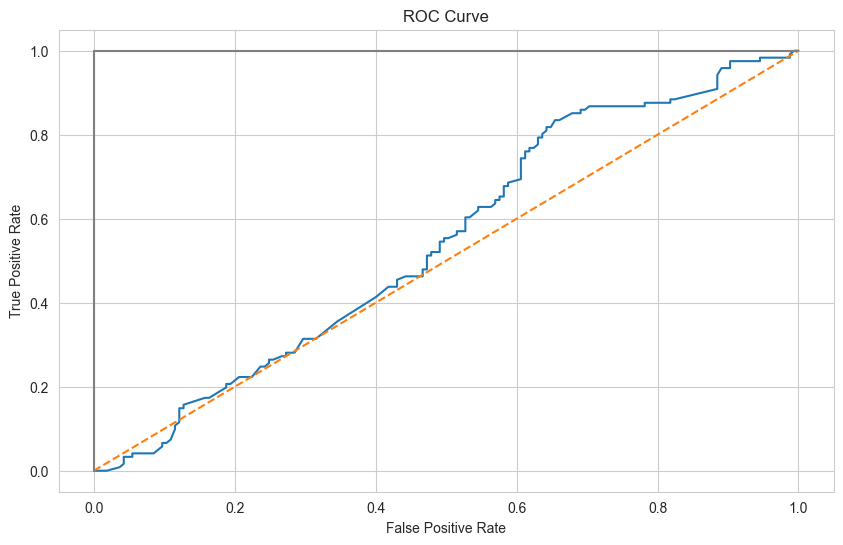

In [1181]:
plot_roc_curve(rf_model, X_test, Y_test)

Accuracy: 0.5734265734265734
Recall: 0.024793388429752067
Precision: 0.42857142857142855
F1 Score: 0.04687500000000001
Mean Average Precision: 0.4232131504858777


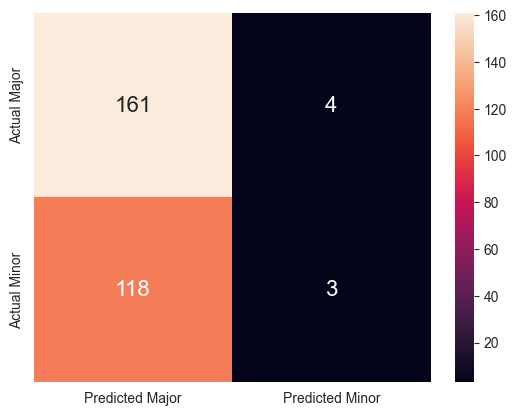

In [1182]:
X_train, X_test, Y_train, Y_test = split_data(df_percentages, 'mode', df_spotify)
rf_model, predictions, rf_accuracy, rf_recall, rf_precision, rf_f1 = random_forest(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5929376408715251


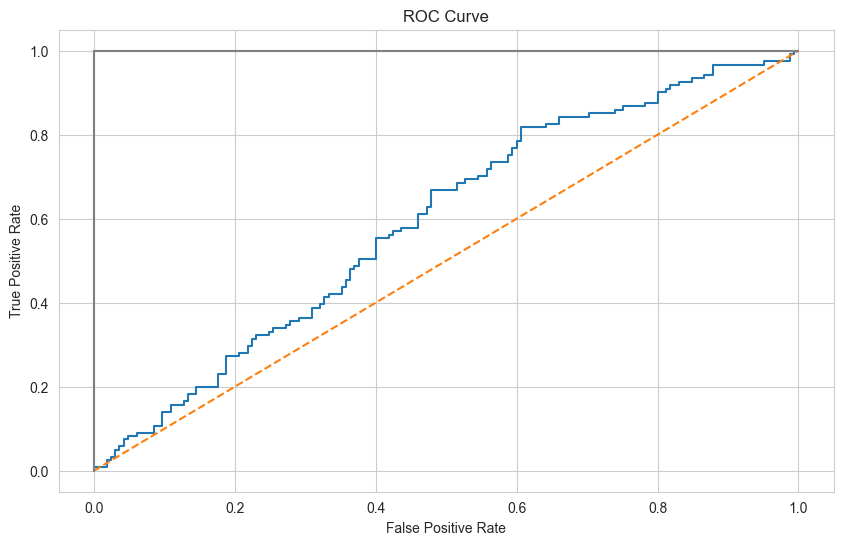

In [1183]:
plot_roc_curve(rf_model, X_test, Y_test)

- After applying Random Forest to all 4 datafarme, we can observe that the best dataframe was the Domain Knowledge. 
- If we look at the ROC graph, Confusion Matrix, and the other evaluation metrics (printed when calling the function each time) we will observe that it gave the best results for the Domain Knowledge.
- Since it is the best, here is the visualization of the decision boundary along with the original data points.

## Visualizing Decision Boundry

- Random Forest creates decision boundaries based on rectangular regions formed by the features in the dataset.

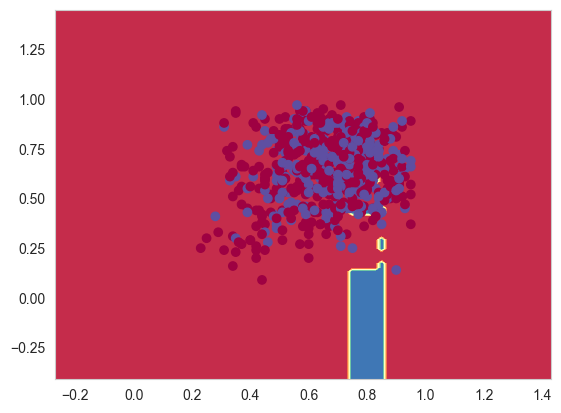

In [1184]:
plot_decision_boundry(X_train, Y_train, 1)

## Naive Bayes

- Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It is particularly well-suited for text classification problems. The "naive" assumption in Naive Bayes is that the features used to describe instances are conditionally independent, given the class label. Despite its simplifying assumption, Naive Bayes often performs well in practice and is computationally efficient. It calculates the probability of each class given a set of input features and selects the class with the highest probability as the predicted class. Naive Bayes is commonly used for spam filtering, sentiment analysis, and other text classification tasks.
- Our goal is to apply Naive Bayes on the 4 dataframe and see which one is better according to the same evaluation metrics mentioned above.

In [1185]:
def naive_bayes(X_train, X_test, Y_train, Y_test):
    # Create a random forest classifier

    nb_model = GaussianNB()

    # Train the model

    nb_model.fit(X_train, Y_train)

    # Make predictions on the test data

    predictions = nb_model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)
    print('Accuracy:', accuracy)

    recall = recall_score(Y_test, predictions)
    print('Recall:', recall)

    precision = precision_score(Y_test, predictions)
    print('Precision:', precision)

    f1 = f1_score(Y_test, predictions)
    print('F1 Score:', f1)

    average_precision = average_precision_score(Y_test, predictions)
    print('Mean Average Precision:', average_precision)

    return nb_model, predictions, accuracy, recall, precision, f1


Accuracy: 0.5034965034965035
Recall: 0.4297520661157025
Precision: 0.416
F1 Score: 0.4227642276422764
Mean Average Precision: 0.4200356007628735


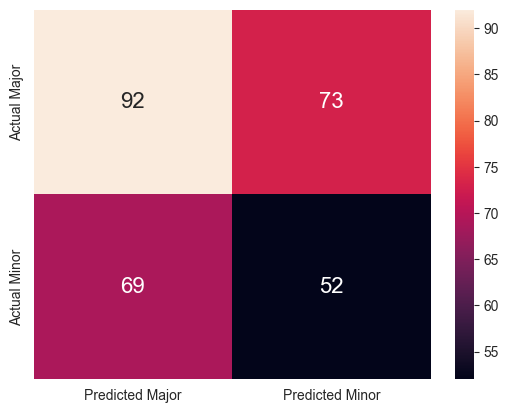

In [1186]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_low_variance, 'mode', df_spotify)
nb_model, predictions, nb_accuracy, nb_recall, nb_precision, nb_f1 = naive_bayes(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.4527422990232907


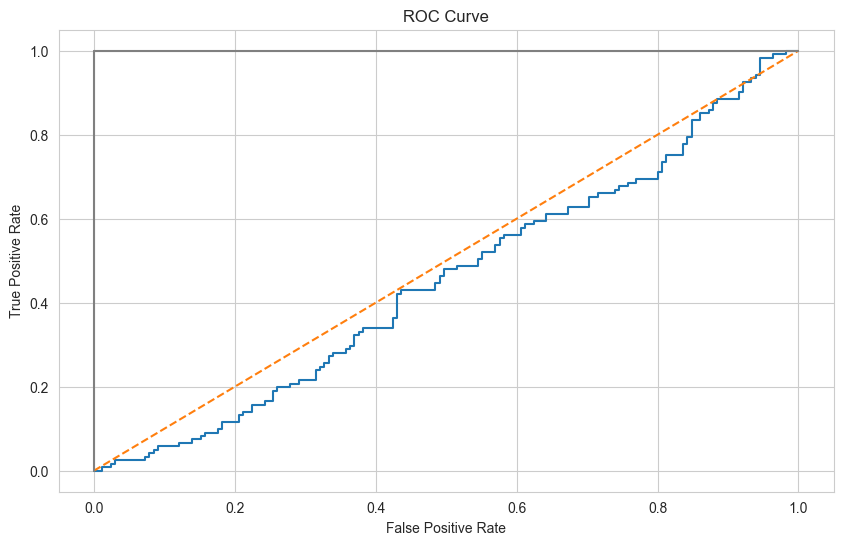

In [1187]:
plot_roc_curve(nb_model, X_test, Y_test)

Accuracy: 0.5244755244755245
Recall: 0.6198347107438017
Precision: 0.45454545454545453
F1 Score: 0.5244755244755245
Mean Average Precision: 0.4425822111772525


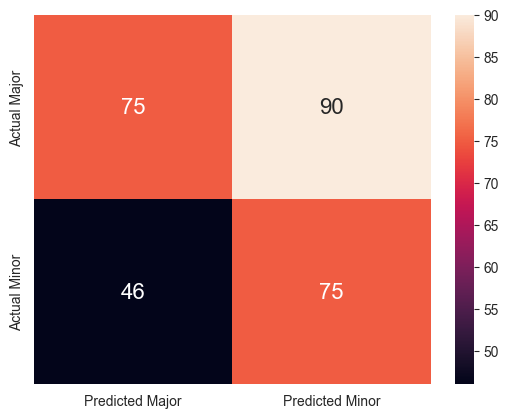

In [1188]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_high_correlation, 'mode', df_spotify)
nb_model, predictions, nb_accuracy, nb_recall, nb_precision, nb_f1 = naive_bayes(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5371900826446282


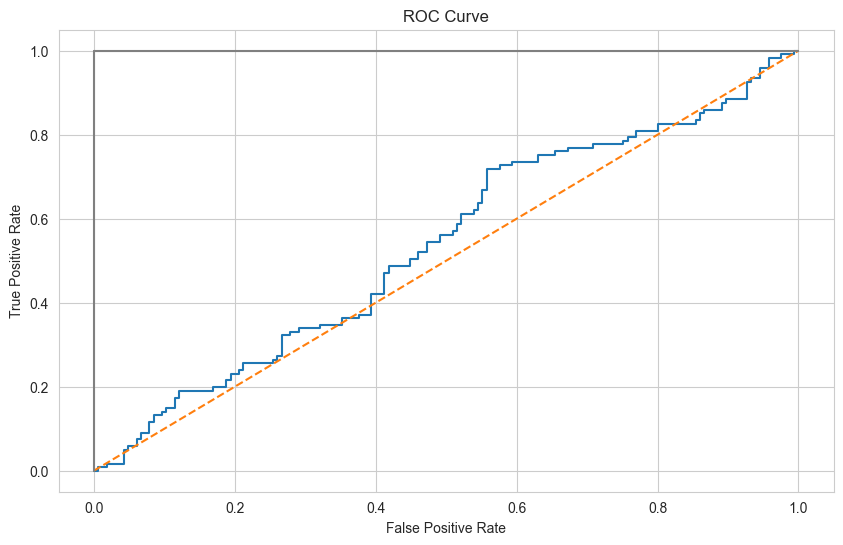

In [1189]:
plot_roc_curve(nb_model, X_test, Y_test)

Accuracy: 0.5174825174825175
Recall: 0.33884297520661155
Precision: 0.41414141414141414
F1 Score: 0.37272727272727274
Mean Average Precision: 0.42004918864423


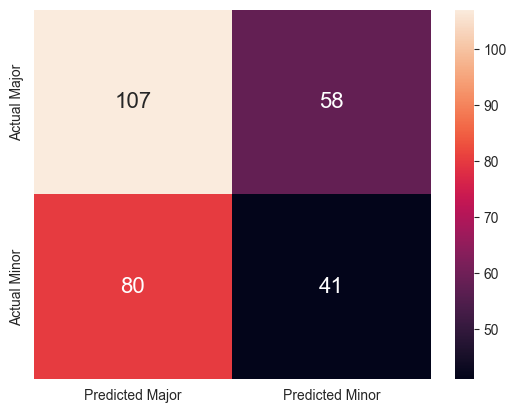

In [1190]:
X_train, X_test, Y_train, Y_test = split_data(df_pca, 'mode', df_spotify)
nb_model, predictions, nb_accuracy, nb_recall, nb_precision, nb_f1 = naive_bayes(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5067868770348108


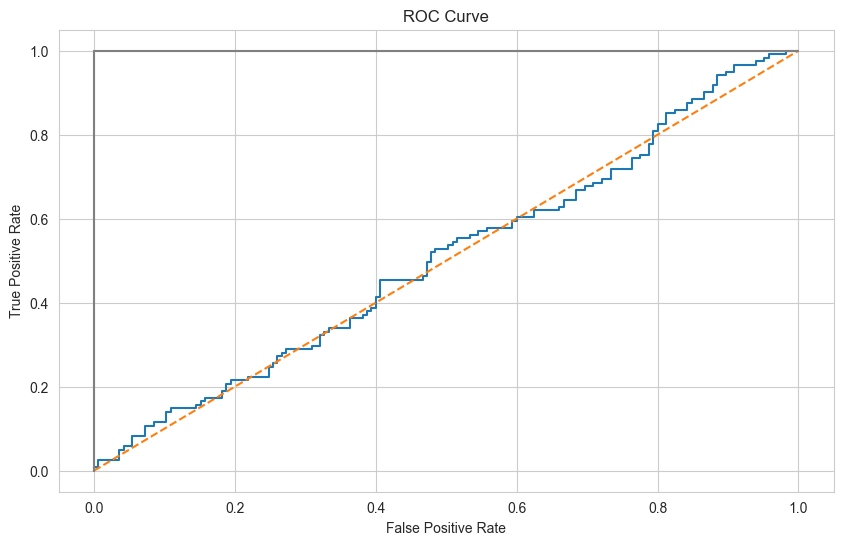

In [1191]:
plot_roc_curve(nb_model, X_test, Y_test)

Accuracy: 0.5664335664335665
Recall: 0.5454545454545454
Precision: 0.4888888888888889
F1 Score: 0.515625
Mean Average Precision: 0.458974358974359


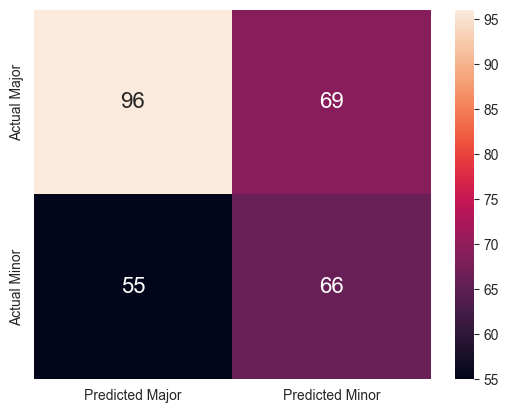

In [1192]:
X_train, X_test, Y_train, Y_test = split_data(df_percentages, 'mode', df_spotify)
nb_model, predictions, nb_accuracy, nb_recall, nb_precision, nb_f1 = naive_bayes(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

ROC AUC Score: 0.5748059103431005


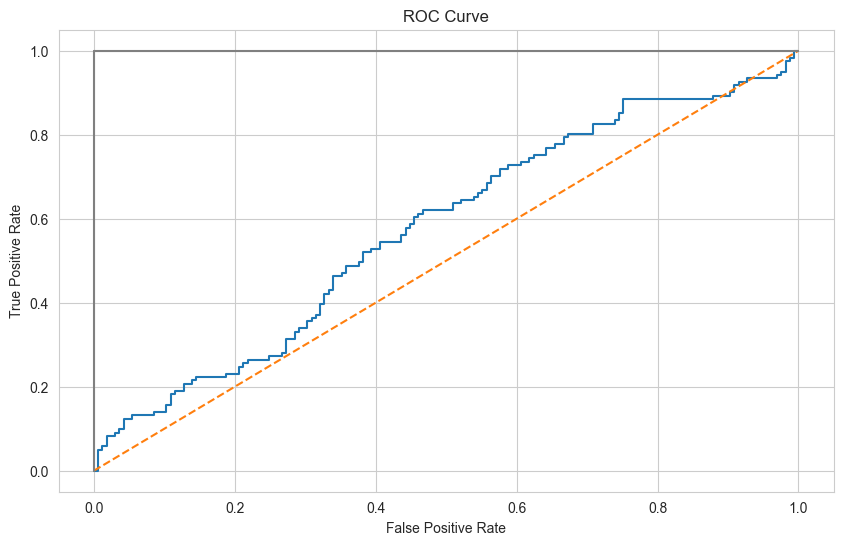

In [1193]:
plot_roc_curve(nb_model, X_test, Y_test)

- After applying Naive Bayes to all 4 datafarme, we can observe that the best dataframe was the Domain Knowledge. 
- If we look at the ROC graph, Confusion Matrix, and the other evaluation metrics (printed when calling the function each time) we will observe that it gave the best results for the Domain Knowledge.
- Since it is the best, here is the visualization of the decision boundary along with the original data points.

## Visualizing Decision Boundry

- Naive Bayes, assumes that the features are normally distributed and creates a curved decision boundary.

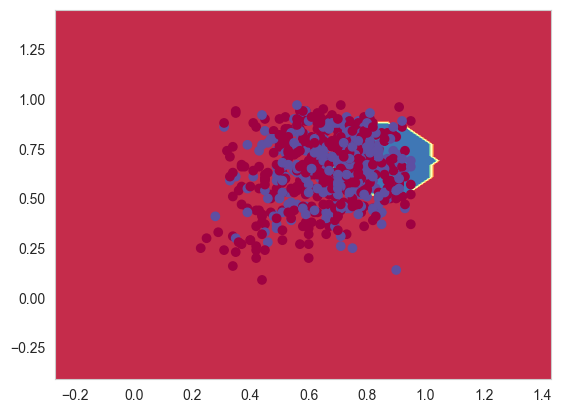

In [1194]:
plot_decision_boundry(X_train, Y_train, 2)

# Classification Result

- After getting the best dataframe for each Classification Algorithm (Domain Knowledge was the best dataframe for all the 3 of them), we compare the values of Accuracy, Precision, Recall, and F1 score and we find that Naive Bayes is the best one, followed by Logistic Regression, and finally Random Forest. Naive Bayes is strongly better than the other 2 algorithms for this dataset. 

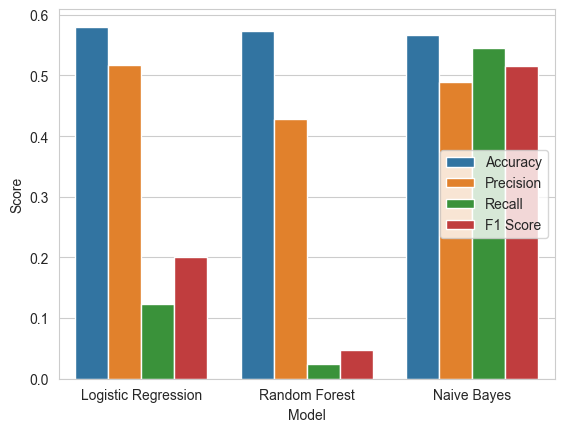

In [1195]:
def compare_classifications(lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1):
    metrics_df = pd.DataFrame({ 'Model' : ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes'],
                                'Metric' : ['Accuracy', 'Accuracy', 'Accuracy', 'Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1 Score', 'F1 Score', 'F1 Score'],
                                'Score' : [lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1]})

    sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
    plt.legend(loc='center right')
    plt.show()
compare_classifications(lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1)